In [501]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

%config InlineBackend.figure_format = 'retina'

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

In [502]:
df = pd.read_csv("churn-bigml-80.csv")

In [503]:
#1- EDA

In [504]:
# The first 5 observation 
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [505]:
# The size of the data set 
df.shape

(2666, 20)

In [506]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [507]:
# Descriptive statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
5%,36.000000,408.000000,0.000000,90.42500,67.000000,15.375000,118.725000,67.000000,10.092500,117.925000,68.000000,5.310000,5.800000,1.000000,1.570000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
90%,151.000000,510.000000,32.000000,248.85000,125.000000,42.305000,265.800000,125.000000,22.590000,264.750000,124.000000,11.915000,13.700000,8.000000,3.700000,3.000000
95%,166.000000,510.000000,36.000000,269.77500,133.000000,45.865000,285.025000,133.000000,24.225000,283.675000,131.000000,12.767500,14.700000,9.000000,3.970000,4.000000


In [508]:
# categorical Variables
categorical_variables = [col for col in df.columns if col in "O"
                        or df[col].nunique() <=14
                        and col not in "Churn"]

categorical_variables

['Area code',
 'International plan',
 'Voice mail plan',
 'Customer service calls']

In [509]:
# Numeric Variables
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11]
numeric_variables

['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge']

In [510]:
# Exited (Dependent Variable)

In [511]:
# Frequency of classes of dependent variable
df["Churn"].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [512]:
# Customers leaving the Telcom
churn = df.loc[df["Churn"]==1]

In [513]:
# Customers who did not leave the Telcom
not_churn = df.loc[df["Churn"]==0]

In [514]:
#Categorical Variables
    #Area code

In [515]:
# Frequency of not_churn group according to Area code
not_churn["Area code"].value_counts().sort_values()

408     575
510     580
415    1123
Name: Area code, dtype: int64

In [516]:
# Frequency of churn group according to Area code
churn["Area code"].value_counts().sort_values()

408     94
510     99
415    195
Name: Area code, dtype: int64

In [517]:
#International plan

In [518]:
# Frequency of not_churn group according to International plan
not_churn["International plan"].value_counts().sort_values()

Yes     152
No     2126
Name: International plan, dtype: int64

In [519]:
# Frequency of churn group according to International plan
churn["International plan"].value_counts().sort_values()

Yes    118
No     270
Name: International plan, dtype: int64

In [520]:
# examining the Voice mail plan of the not_churn group
not_churn["Voice mail plan"].value_counts().sort_values()

Yes     668
No     1610
Name: Voice mail plan, dtype: int64

In [521]:
# examining the Voice mail plan of the churn group
churn["Voice mail plan"].value_counts().sort_values()

Yes     65
No     323
Name: Voice mail plan, dtype: int64

In [522]:
#Customer service calls

In [523]:
# examining the Customer service calls of the not_churn group
not_churn["Customer service calls"].value_counts().sort_values()

7      3
6      7
5     20
4     69
3    311
0    476
2    546
1    846
Name: Customer service calls, dtype: int64

In [524]:
# examining the Customer service calls of the churn group
churn["Customer service calls"].value_counts().sort_values()

8     1
9     2
7     5
6    10
5    29
3    37
2    62
4    64
0    79
1    99
Name: Customer service calls, dtype: int64

In [525]:
#Numerical Variables
    #Account length

In [526]:
# Let's examine the Account length of the not_churn group
not_churn["Account length"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      100.330992
std        39.458936
min         1.000000
5%         36.000000
25%        73.000000
50%       100.000000
75%       127.000000
90%       151.000000
95%       165.150000
99%       192.230000
max       243.000000
Name: Account length, dtype: float64

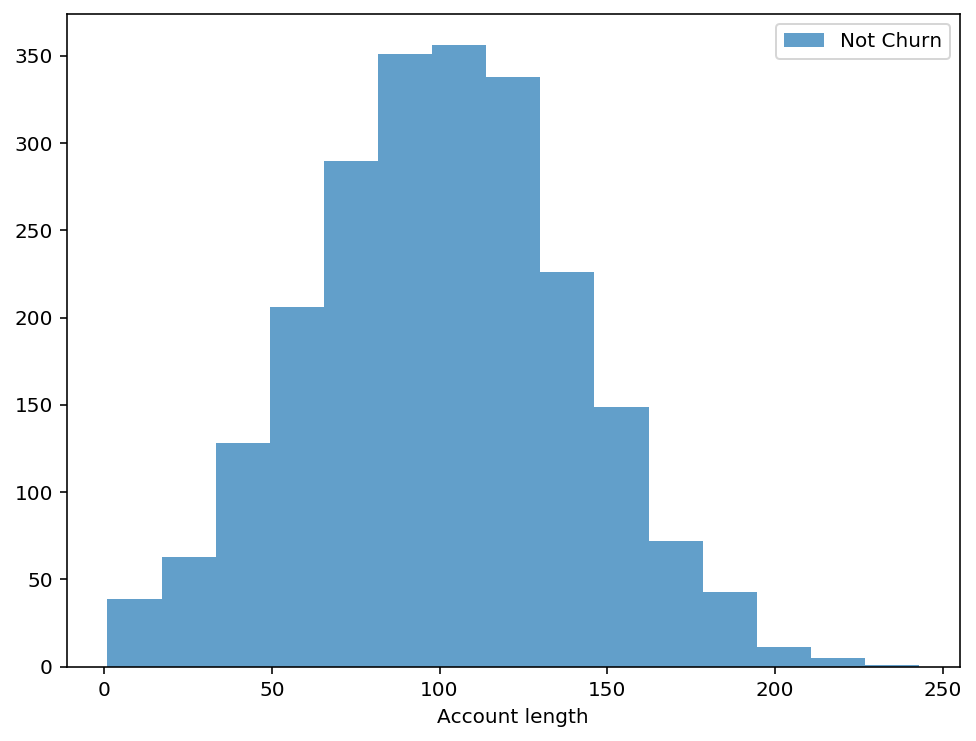

In [527]:
# distribution of the Account length for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Account length')
pyplot.hist(not_churn["Account length"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [528]:
# Let's examine the credit score of the churn group
churn["Account length"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     102.319588
std       40.184599
min        1.000000
5%        36.350000
25%       75.750000
50%      103.000000
75%      127.000000
90%      155.500000
95%      170.000000
99%      197.520000
max      225.000000
Name: Account length, dtype: float64

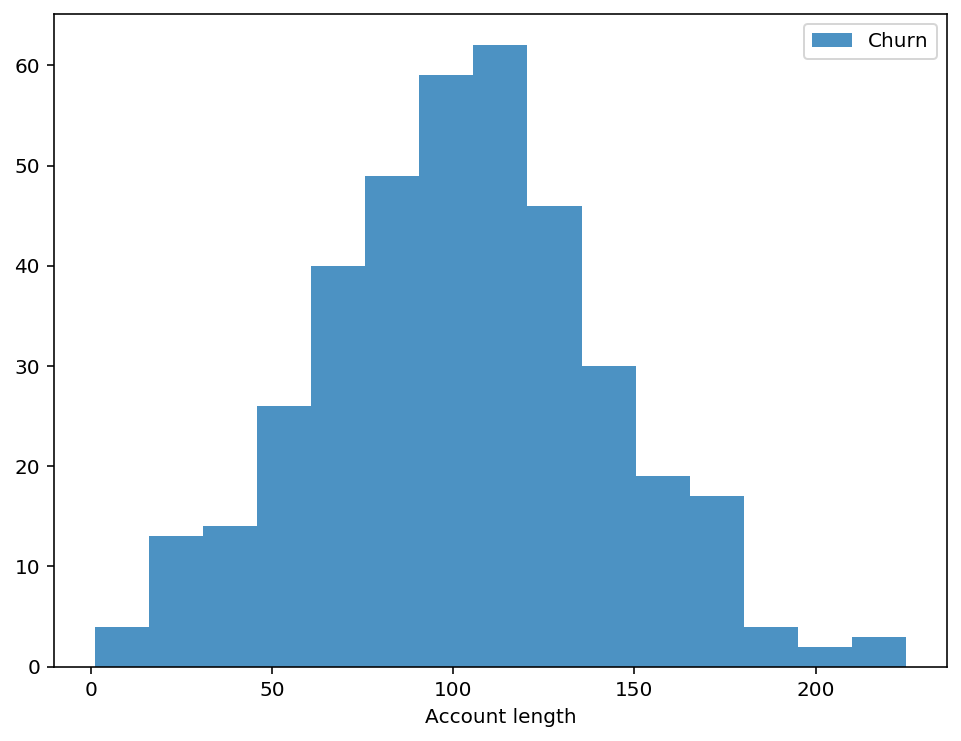

In [529]:
# distribution of the Credit Score for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Account length')
pyplot.hist(churn["Account length"],bins=15, alpha=0.8, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

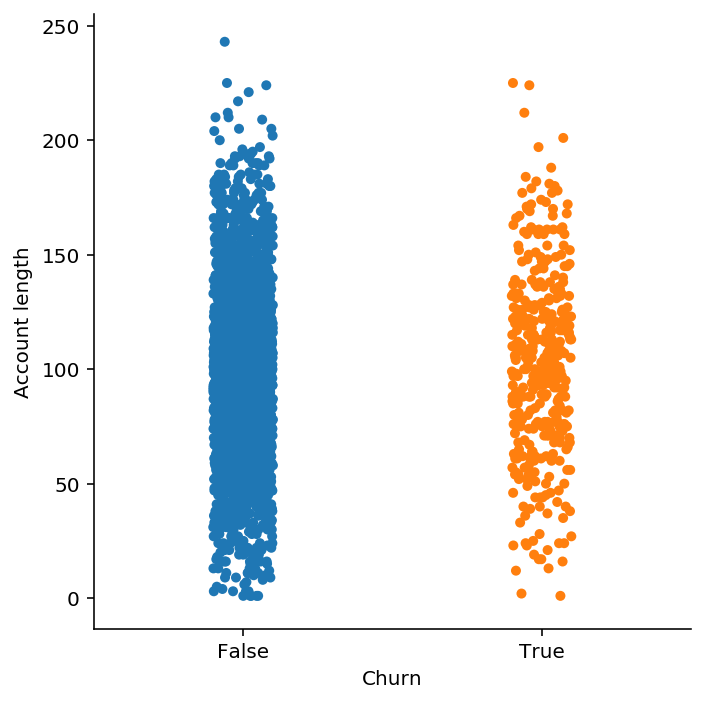

In [530]:
sns.catplot("Churn", "Account length", data = df)

In [531]:
#Number vmail messages

In [532]:
# examining the age of the not_churn group
not_churn["Number vmail messages"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean        8.507463
std        13.830160
min         0.000000
5%          0.000000
25%         0.000000
50%         0.000000
75%        21.000000
90%        32.000000
95%        37.000000
99%        43.000000
max        50.000000
Name: Number vmail messages, dtype: float64

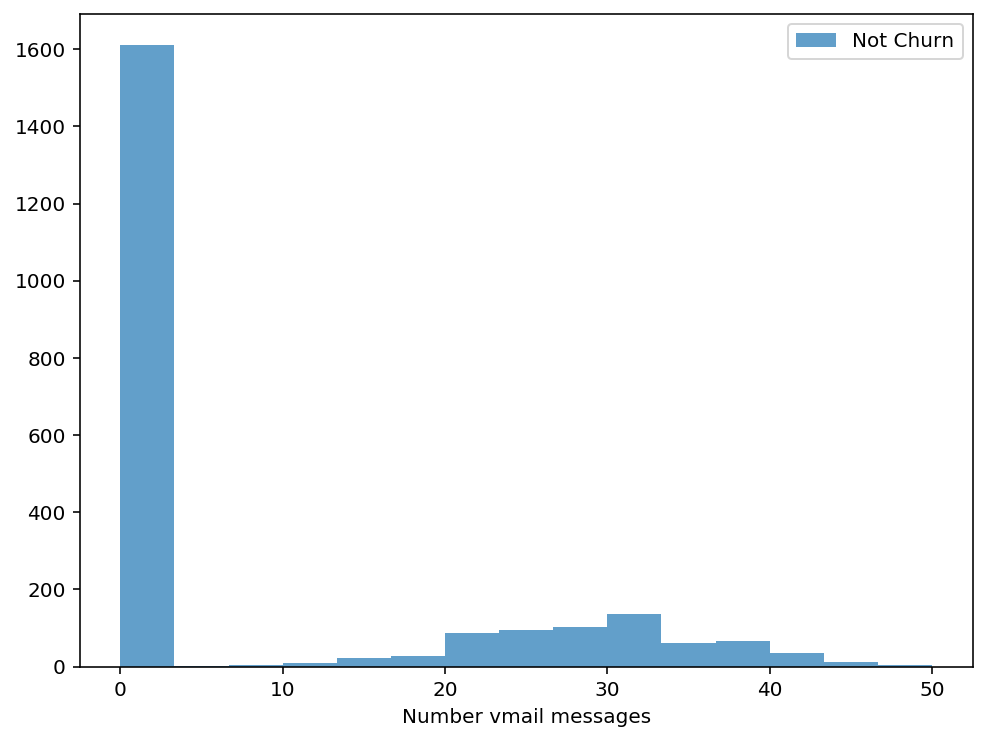

In [533]:
# distribution of the Number vmail messages for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Number vmail messages')
pyplot.hist(not_churn["Number vmail messages"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [534]:
# examine the Number vmail messages of the churn group
churn["Number vmail messages"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean       5.170103
std       11.876493
min        0.000000
5%         0.000000
25%        0.000000
50%        0.000000
75%        0.000000
90%       29.000000
95%       33.000000
99%       42.000000
max       45.000000
Name: Number vmail messages, dtype: float64

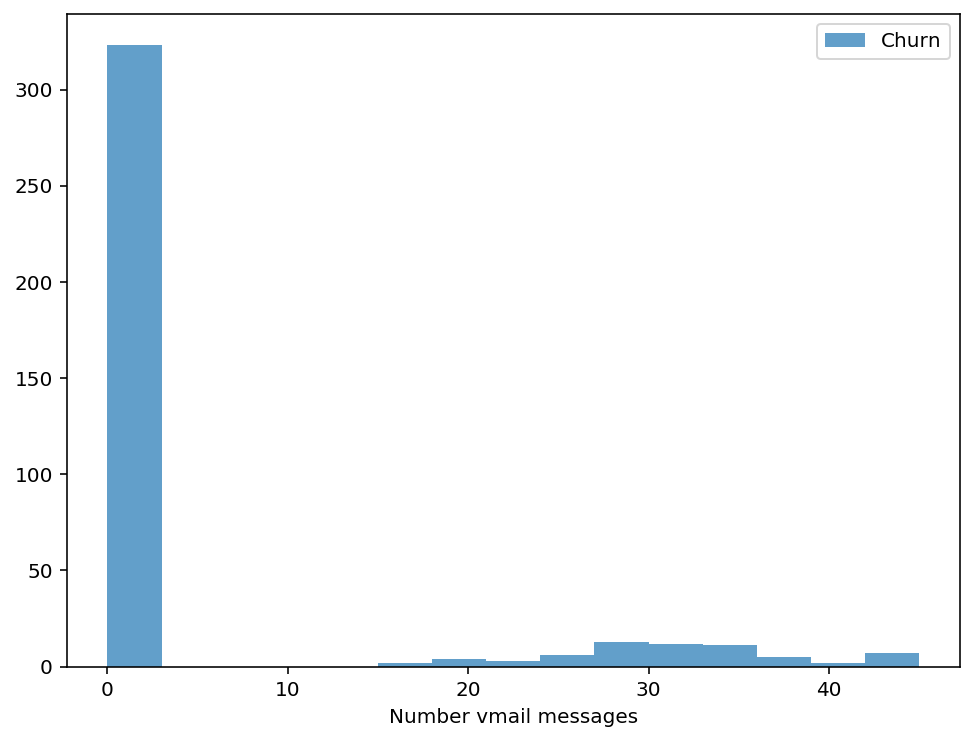

In [535]:
# distribution of the Age for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Number vmail messages')
pyplot.hist(churn["Number vmail messages"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

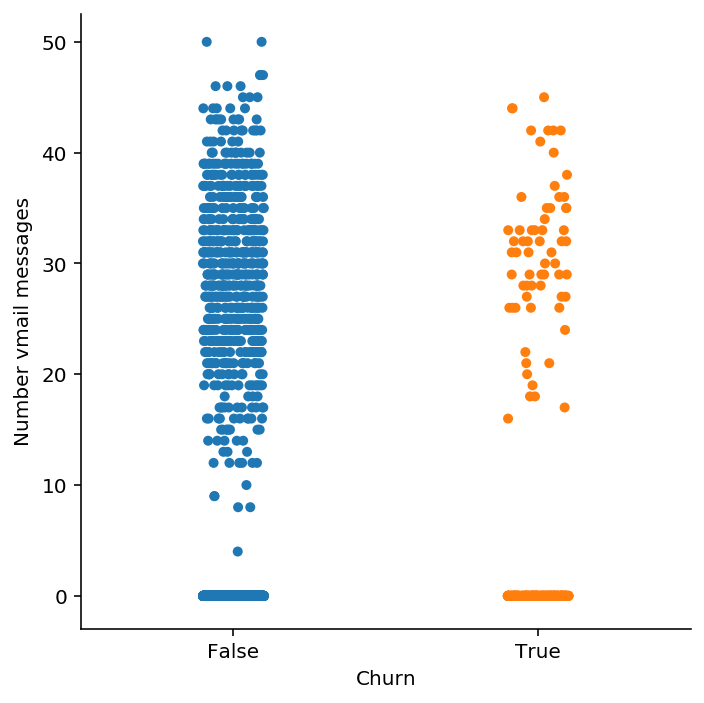

In [536]:
sns.catplot("Churn", "Number vmail messages", data = df)

In [537]:
#Total day minutes

In [538]:
# examining the Total day minutes of the not_churn group
not_churn["Total day minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      175.104346
std        50.105334
min         0.000000
5%         89.700000
25%       142.500000
50%       177.900000
75%       209.800000
90%       237.100000
95%       253.760000
99%       283.123000
max       313.800000
Name: Total day minutes, dtype: float64

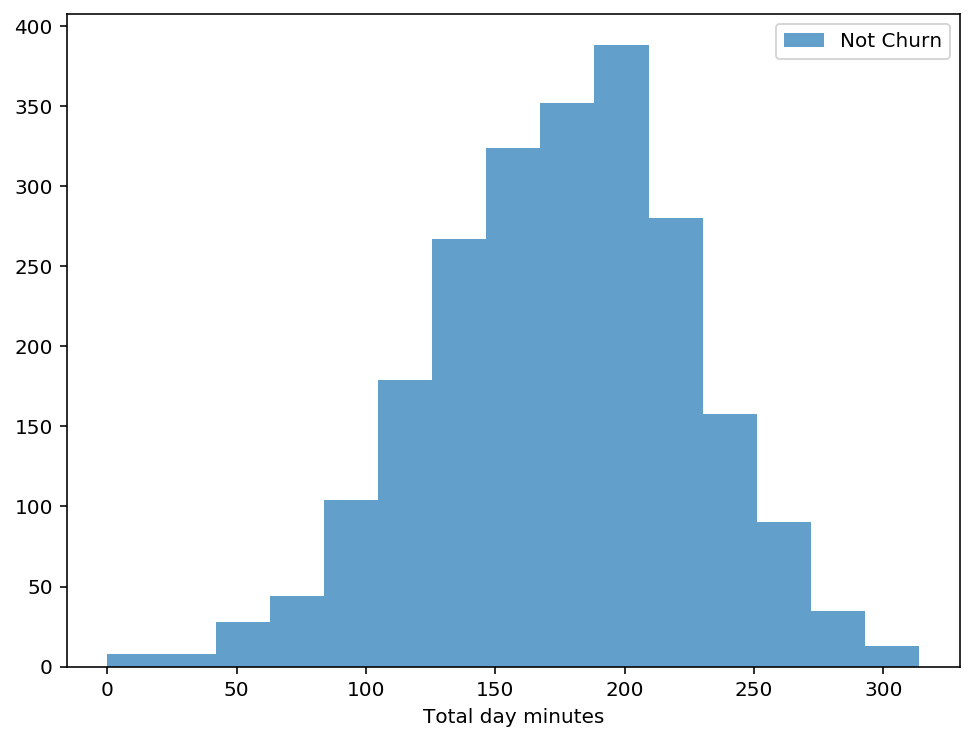

In [539]:
# distribution of the Total day minutes for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day minutes')
pyplot.hist(not_churn["Total day minutes"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [540]:
# examining the Total day minutes of the churn group
churn["Total day minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     205.181186
std       68.490213
min        0.000000
5%        97.650000
25%      150.900000
50%      214.950000
75%      262.200000
90%      289.100000
95%      304.680000
99%      335.747000
max      350.800000
Name: Total day minutes, dtype: float64

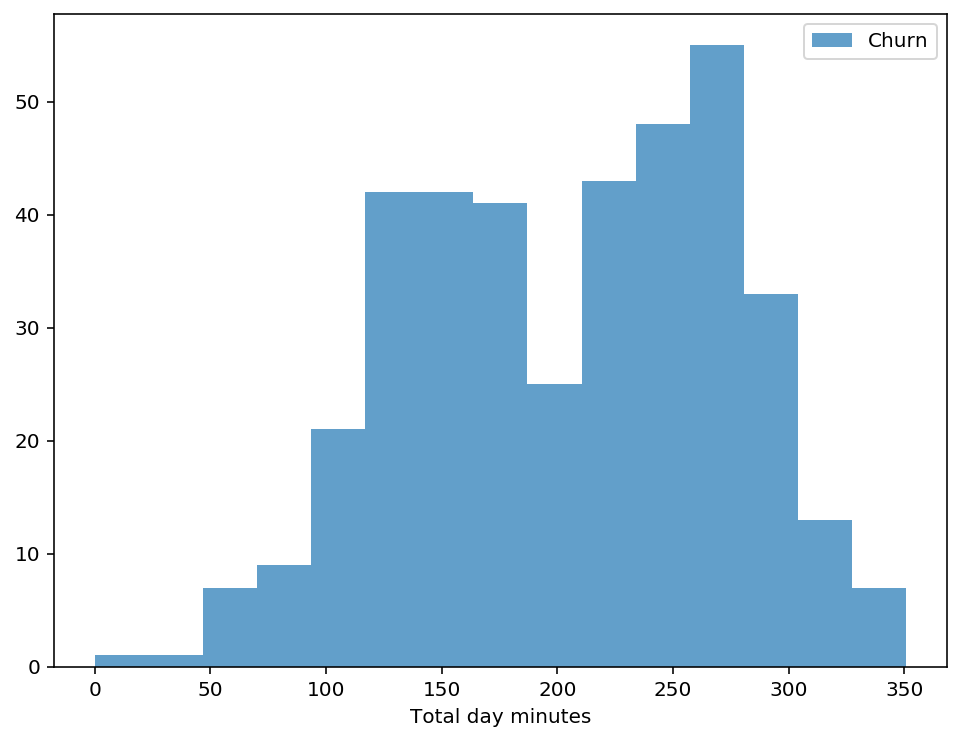

In [541]:
# distribution of the Total day minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day minutes')
pyplot.hist(churn["Total day minutes"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

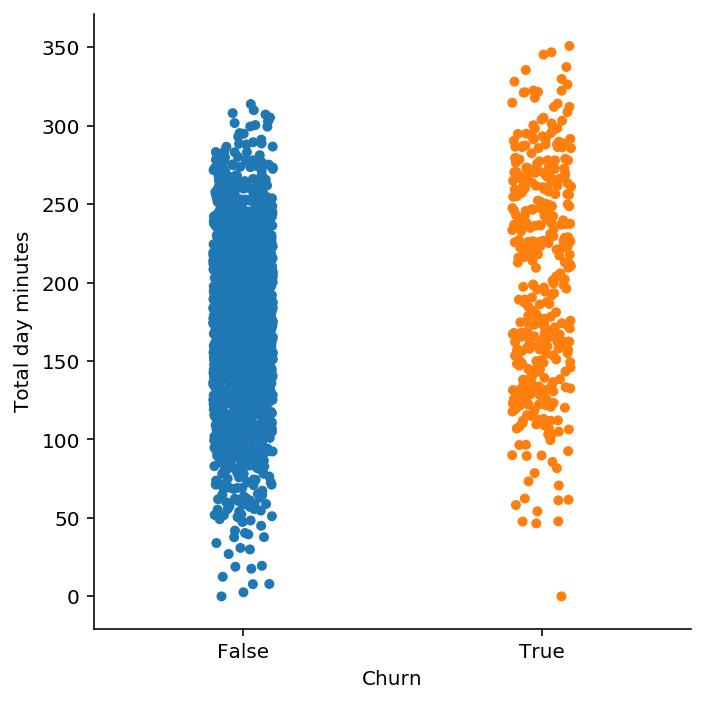

In [542]:
sns.catplot("Churn", "Total day minutes", data = df)

In [543]:
#Total day calls

In [544]:
# examining the Total day calls of the not_churn group
not_churn["Total day calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      100.159350
std        19.681914
min         0.000000
5%         67.000000
25%        87.000000
50%       100.000000
75%       113.000000
90%       125.000000
95%       133.000000
99%       146.000000
max       160.000000
Name: Total day calls, dtype: float64

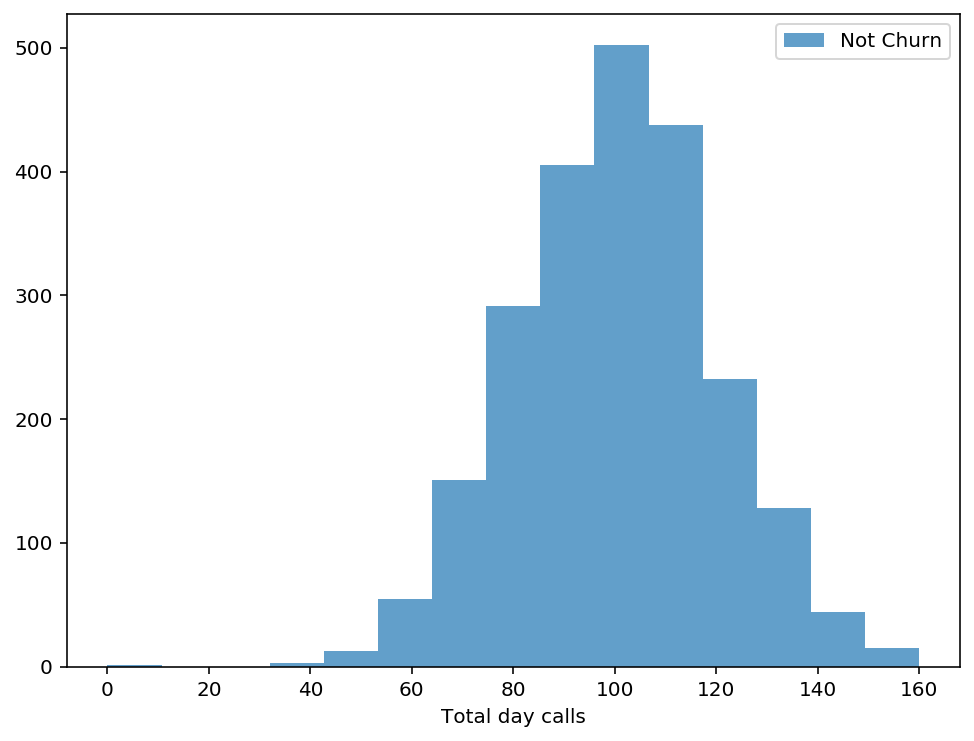

In [545]:
# distribution of the Total day calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day calls')
pyplot.hist(not_churn["Total day calls"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [546]:
# examining the Total day calls of the churn group
churn["Total day calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     101.195876
std       21.705279
min        0.000000
5%        63.000000
25%       87.000000
50%      103.000000
75%      116.000000
90%      126.300000
95%      134.000000
99%      147.130000
max      156.000000
Name: Total day calls, dtype: float64

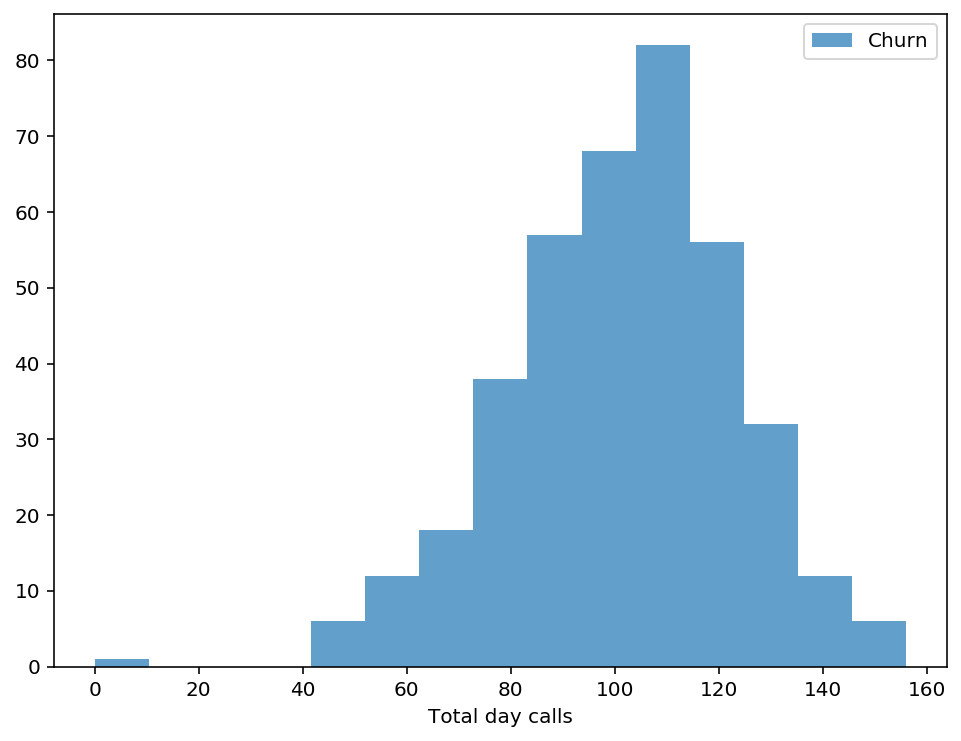

In [547]:
# distribution of the Total day calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day calls')
pyplot.hist(churn["Total day calls"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

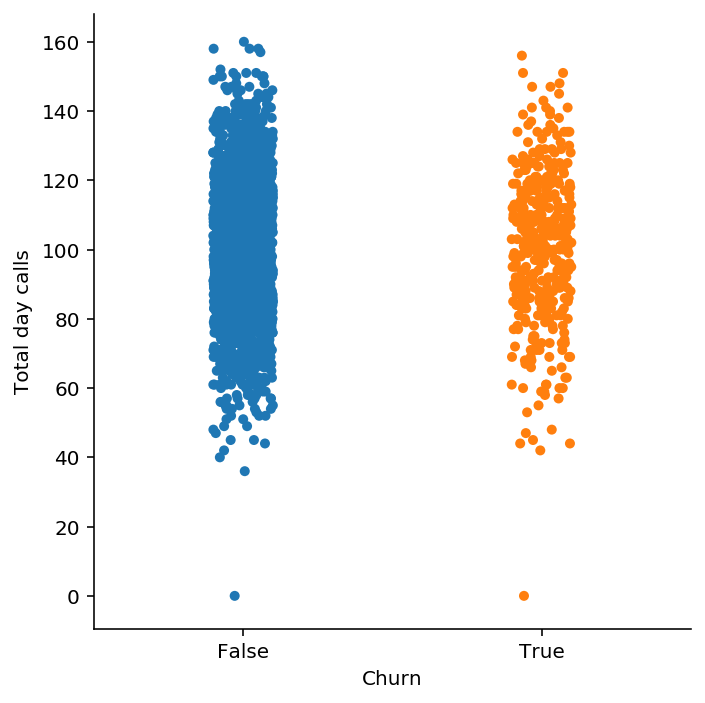

In [548]:
sns.catplot("Churn", "Total day calls", data = df)

In [549]:
#Total day charge

In [550]:
# examining the Total day minutes of the not_churn group
not_churn["Total day charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean       29.768266
std         8.517839
min         0.000000
5%         15.250000
25%        24.230000
50%        30.240000
75%        35.670000
90%        40.310000
95%        43.140500
99%        48.132300
max        53.350000
Name: Total day charge, dtype: float64

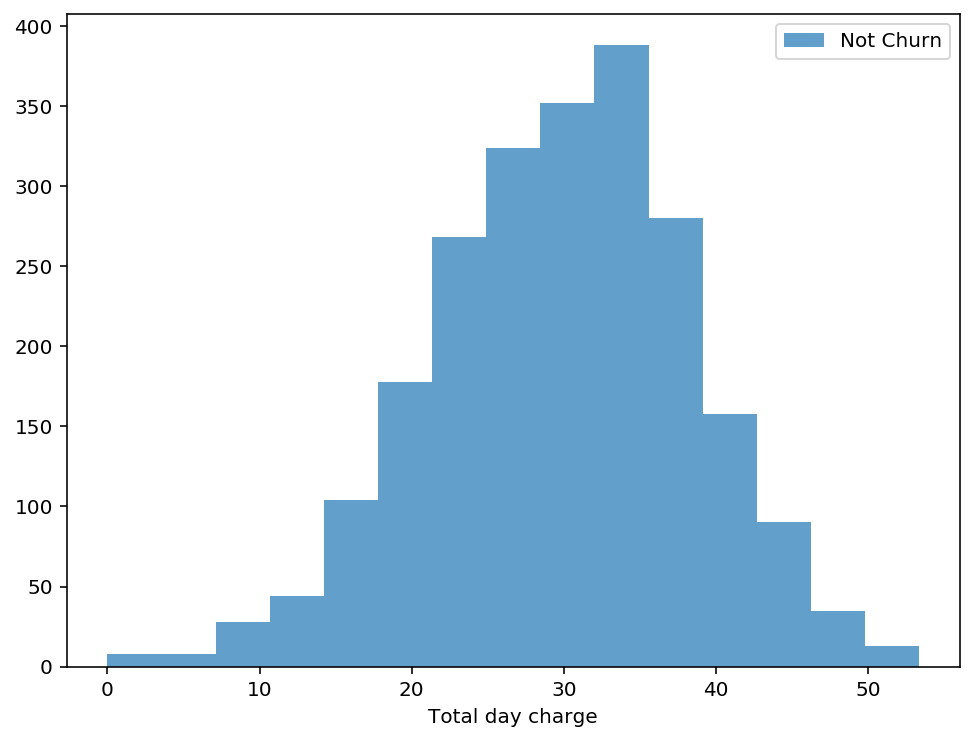

In [551]:
# distribution of the Total day charge for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day charge')
pyplot.hist(not_churn["Total day charge"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [552]:
# examining the Total day charge of the churn group
churn["Total day charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean      34.881340
std       11.643479
min        0.000000
5%        16.598500
25%       25.652500
50%       36.540000
75%       44.577500
90%       49.151000
95%       51.796500
99%       57.081600
max       59.640000
Name: Total day charge, dtype: float64

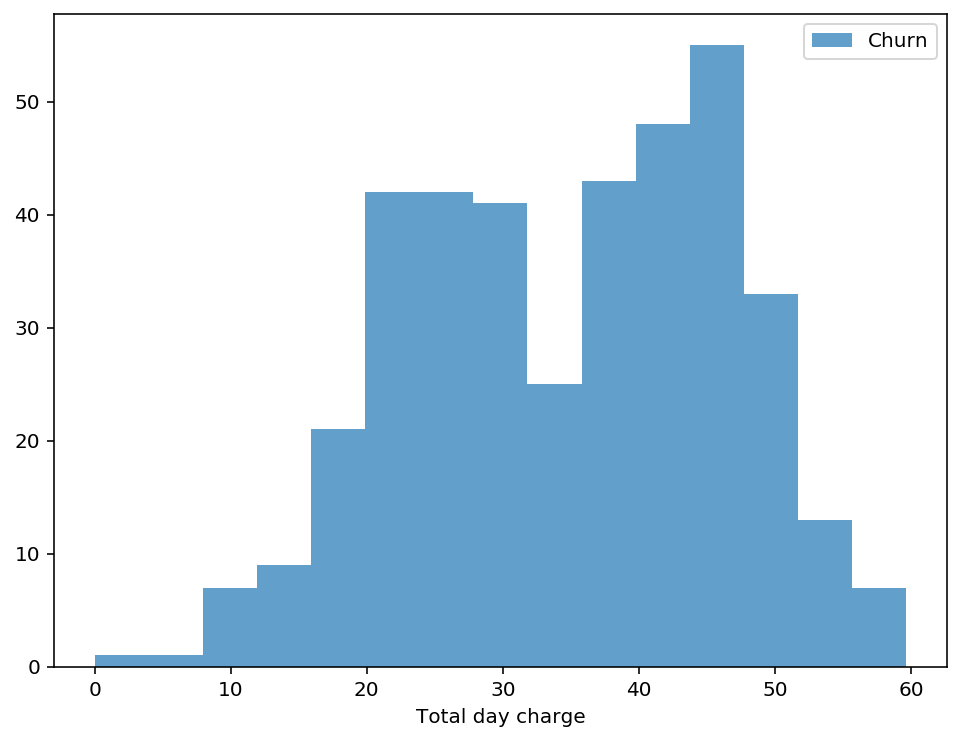

In [553]:
# distribution of the Total day charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total day charge')
pyplot.hist(churn["Total day charge"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

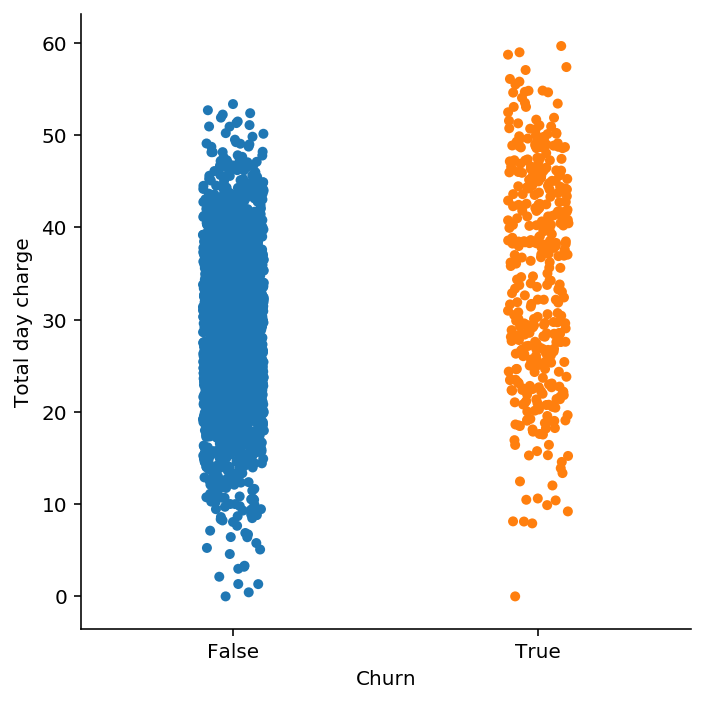

In [554]:
sns.catplot("Churn", "Total day charge", data = df)

In [555]:
#Total eve minutes

In [556]:
# examining the Total eve minutes of the not_churn group
not_churn["Total eve minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      198.853380
std        50.818954
min         0.000000
5%        117.770000
25%       163.625000
50%       199.550000
75%       233.475000
90%       264.430000
95%       283.300000
99%       318.723000
max       354.200000
Name: Total eve minutes, dtype: float64

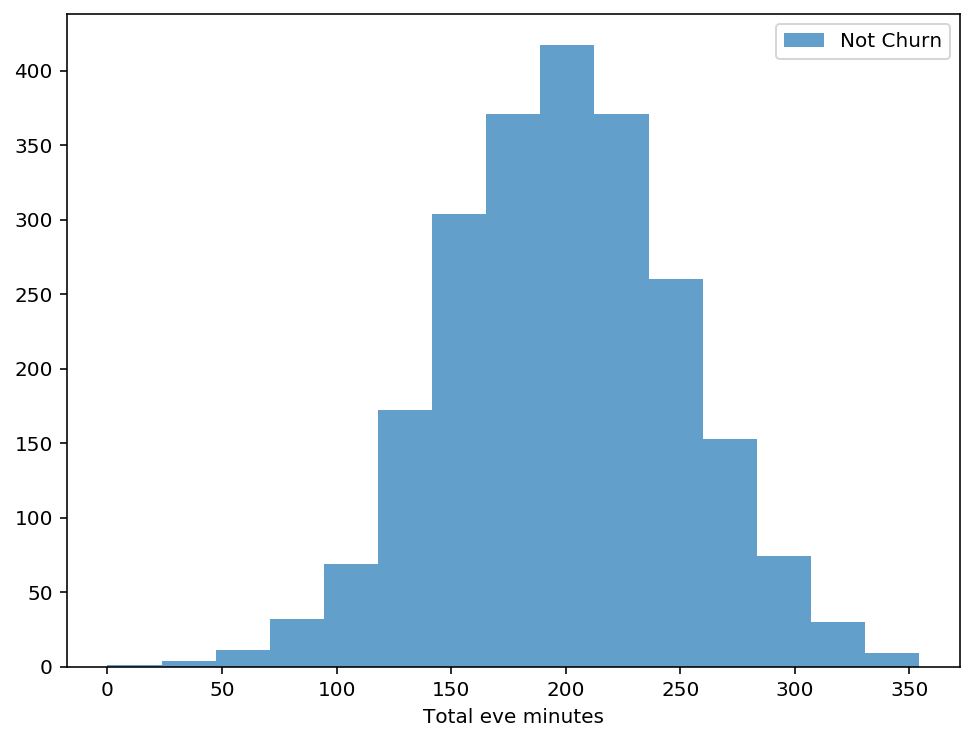

In [557]:
# distribution of the Total eve minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve minutes')
pyplot.hist(not_churn["Total eve minutes"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [558]:
# examining the Total eve minutes of the churn group
churn["Total eve minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     209.385309
std       50.863718
min       70.900000
5%       126.675000
25%      173.150000
50%      209.000000
75%      248.325000
90%      273.760000
95%      287.755000
99%      328.677000
max      363.700000
Name: Total eve minutes, dtype: float64

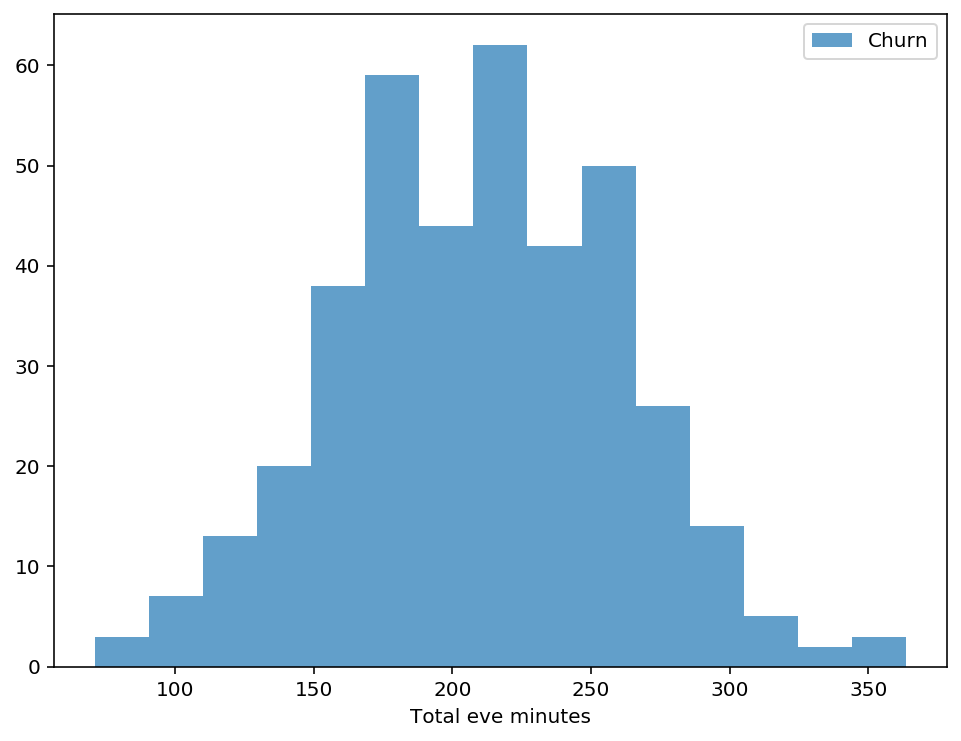

In [559]:
# distribution of the Total eve minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve minutes')
pyplot.hist(churn["Total eve minutes"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

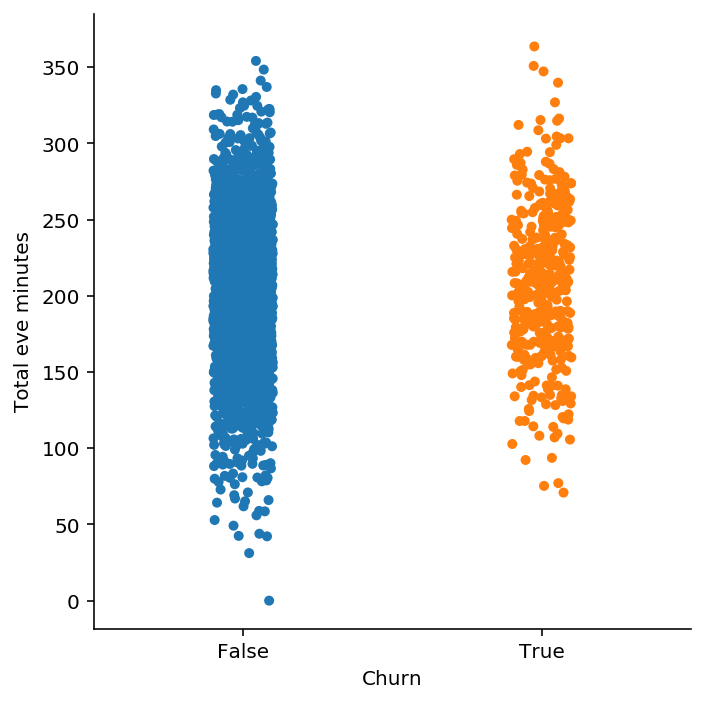

In [560]:
sns.catplot("Churn", "Total eve minutes", data = df)

In [561]:
#Total eve calls

In [562]:
# examining the Total eve calls of the not_churn group
not_churn["Total eve calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      100.036435
std        20.258800
min         0.000000
5%         66.000000
25%        87.000000
50%       100.000000
75%       114.000000
90%       126.000000
95%       134.000000
99%       148.000000
max       170.000000
Name: Total eve calls, dtype: float64

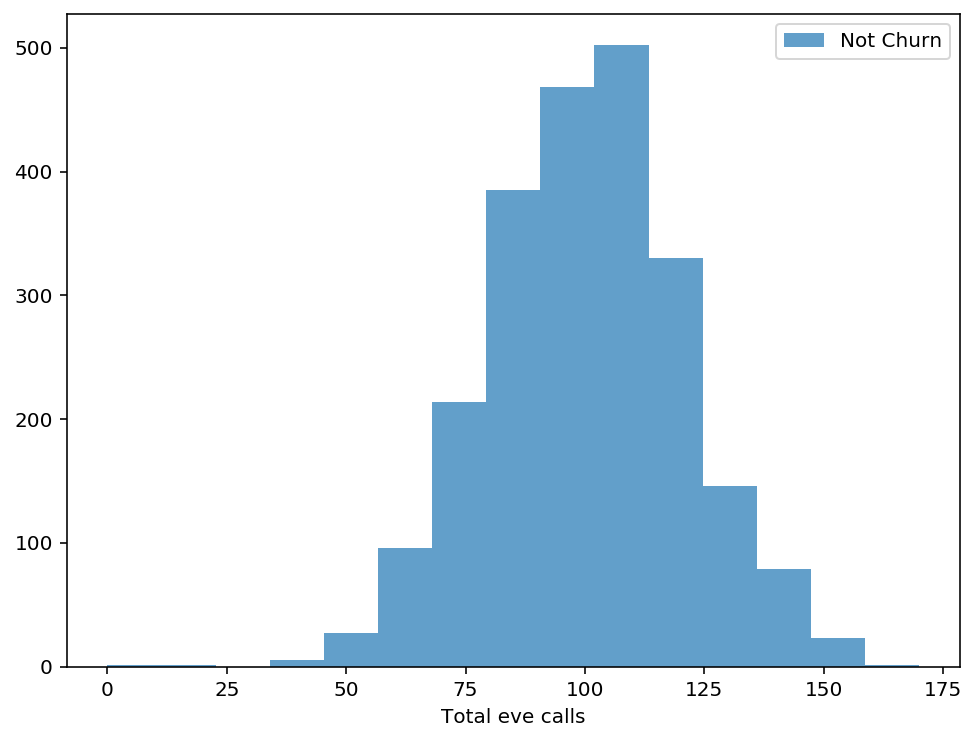

In [563]:
# distribution of the Total eve calls for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve calls')
pyplot.hist(not_churn["Total eve calls"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [564]:
# examining the Total eve calls of the churn group
churn["Total eve calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean      99.948454
std       19.605474
min       48.000000
5%        67.000000
25%       86.000000
50%      100.500000
75%      113.000000
90%      125.000000
95%      132.000000
99%      142.130000
max      159.000000
Name: Total eve calls, dtype: float64

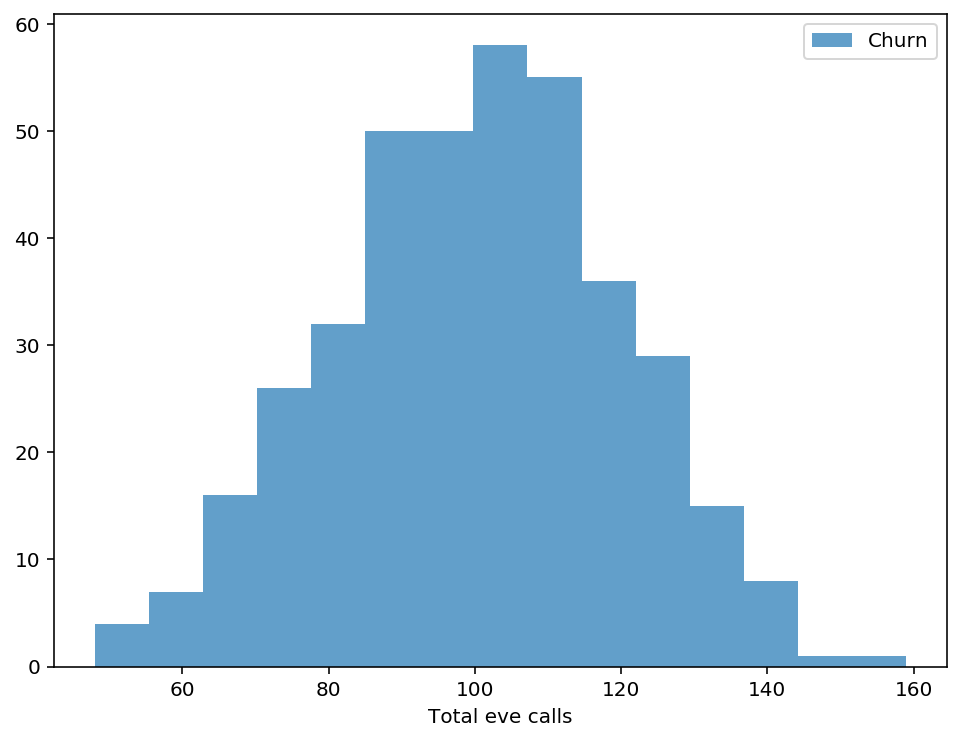

In [565]:
# distribution of the Total eve calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve calls')
pyplot.hist(churn["Total eve calls"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

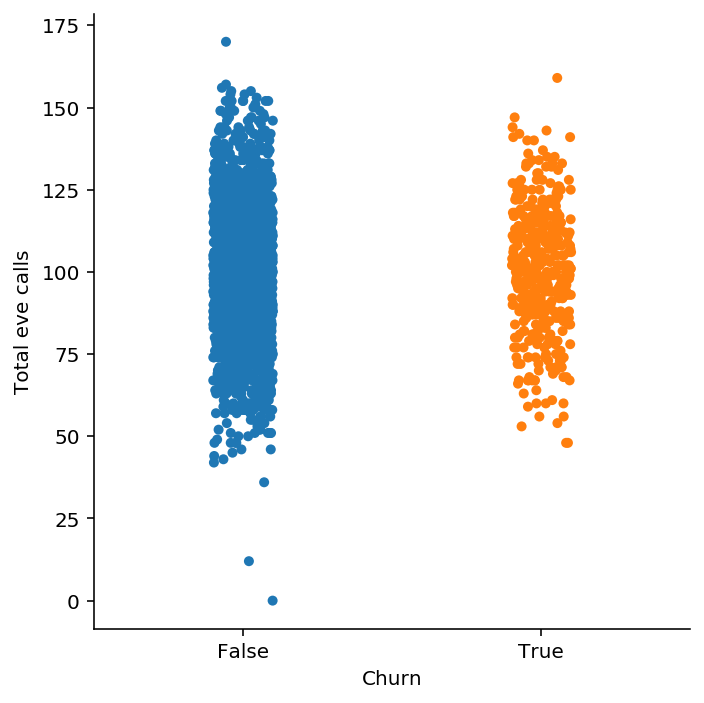

In [566]:
sns.catplot("Churn", "Total eve calls", data = df)

In [567]:
#Total eve charge

In [568]:
# examining the Total eve charge of the not_churn group
not_churn["Total eve charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean       16.902809
std         4.319614
min         0.000000
5%         10.008500
25%        13.910000
50%        16.965000
75%        19.847500
90%        22.473000
95%        24.080000
99%        27.092300
max        30.110000
Name: Total eve charge, dtype: float64

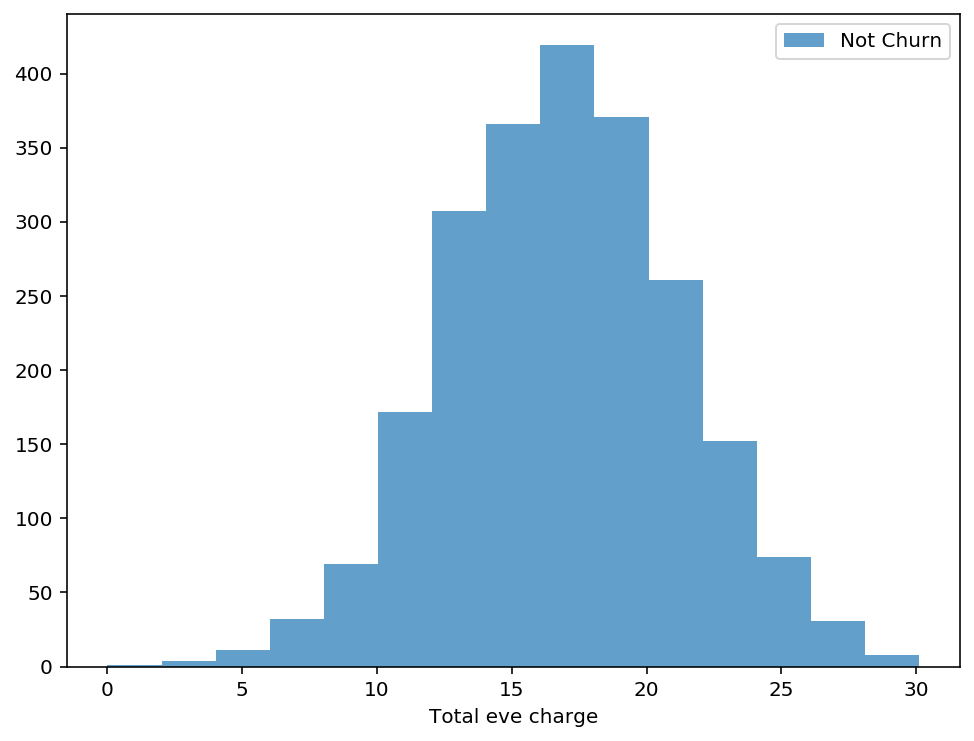

In [569]:
# distribution of the Total eve charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve charge')
pyplot.hist(not_churn["Total eve charge"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [570]:
# examining the Total eve charge of the churn group
churn["Total eve charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean      17.797861
std        4.323327
min        6.030000
5%        10.767000
25%       14.717500
50%       17.765000
75%       21.110000
90%       23.266000
95%       24.459000
99%       27.941700
max       30.910000
Name: Total eve charge, dtype: float64

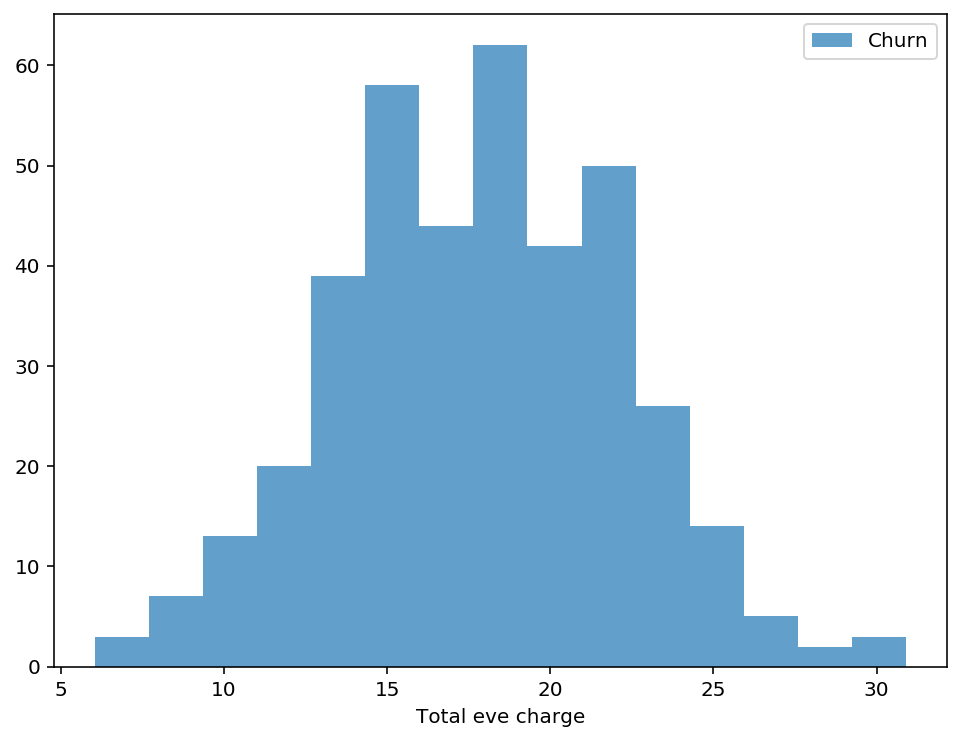

In [571]:
# distribution of the Total eve charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total eve charge')
pyplot.hist(churn["Total eve charge"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

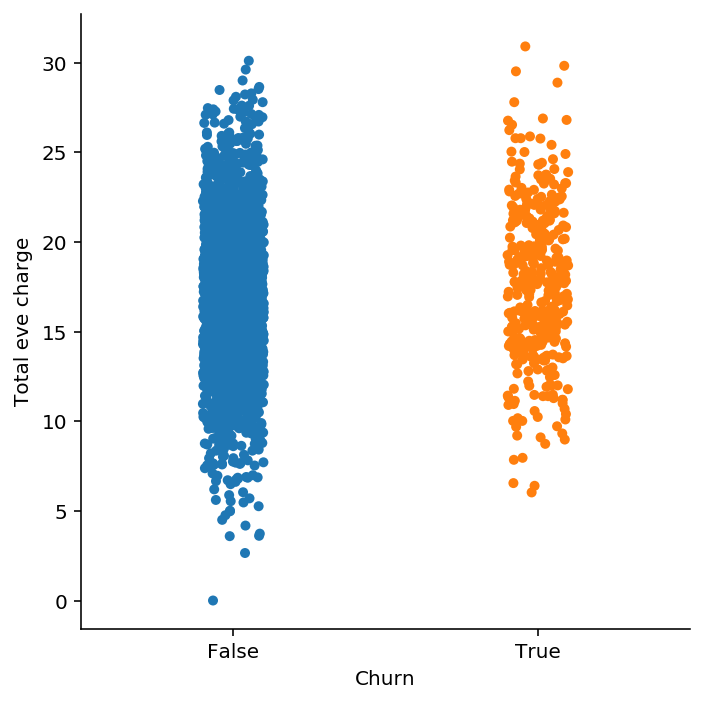

In [572]:
sns.catplot("Churn", "Total eve charge", data = df)

In [573]:
#Total night minutes

In [574]:
# examining the Total night minutes of the not_churn group
not_churn["Total night minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      200.464091
std        51.284496
min        43.700000
5%        114.500000
25%       165.825000
50%       200.000000
75%       235.675000
90%       264.330000
95%       284.505000
99%       320.838000
max       395.000000
Name: Total night minutes, dtype: float64

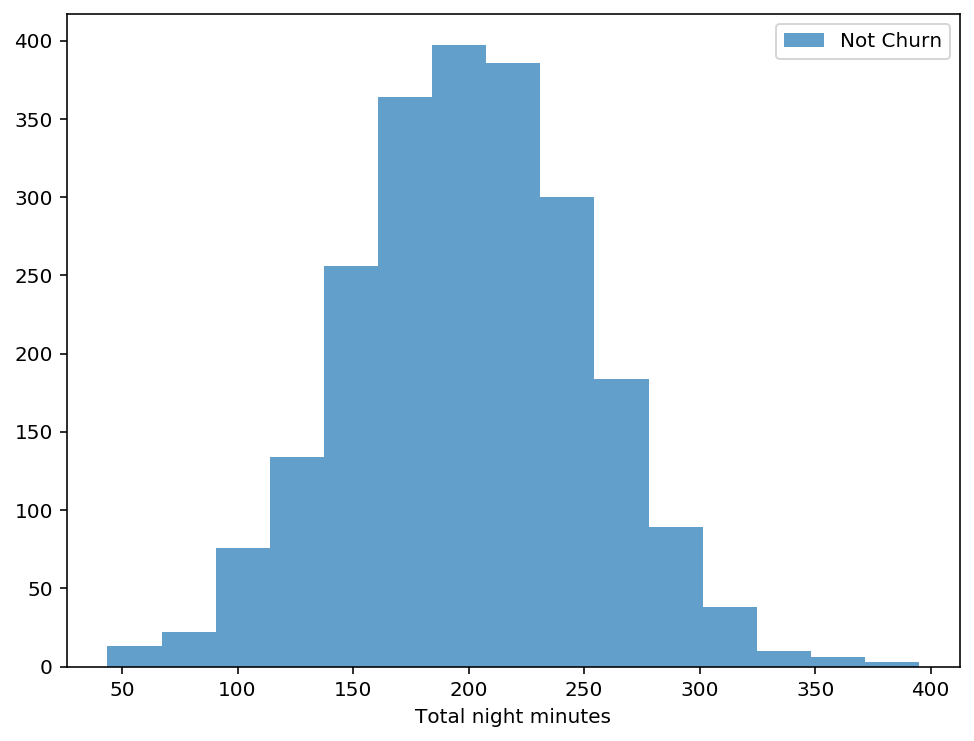

In [575]:
# distribution of the Total night minutes for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night minutes')
pyplot.hist(not_churn["Total night minutes"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [576]:
# examining the Total night minutes of the churn group
churn["Total night minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     205.307216
std       47.565157
min       47.400000
5%       129.250000
25%      169.925000
50%      204.950000
75%      241.150000
90%      266.960000
95%      280.695000
99%      308.926000
max      354.900000
Name: Total night minutes, dtype: float64

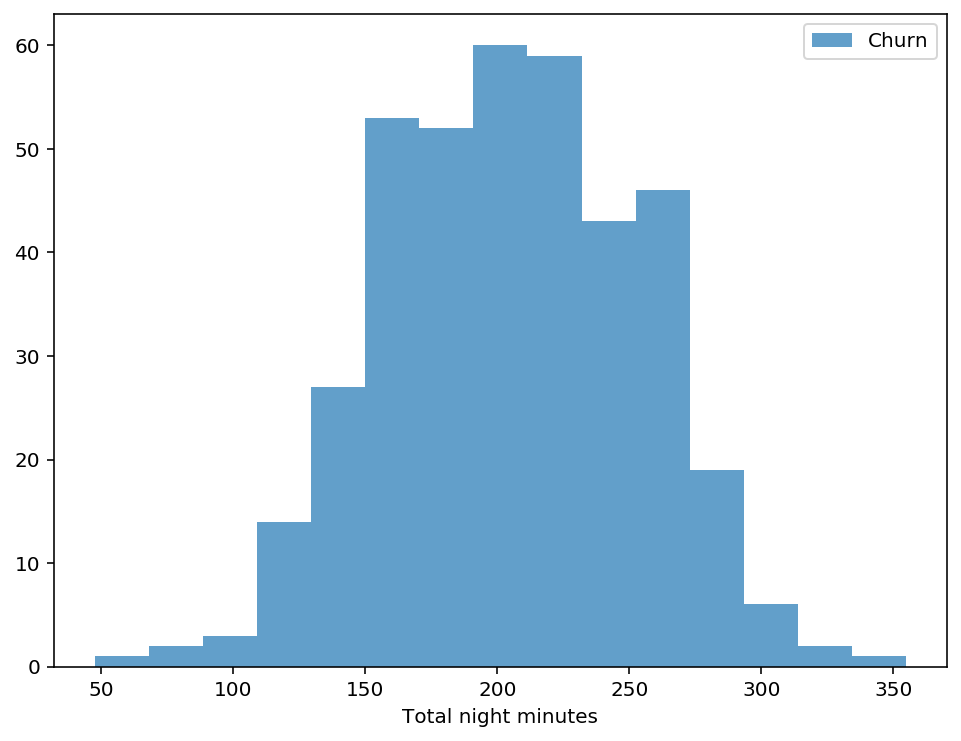

In [577]:
# distribution of the Total night minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night minutes')
pyplot.hist(churn["Total night minutes"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

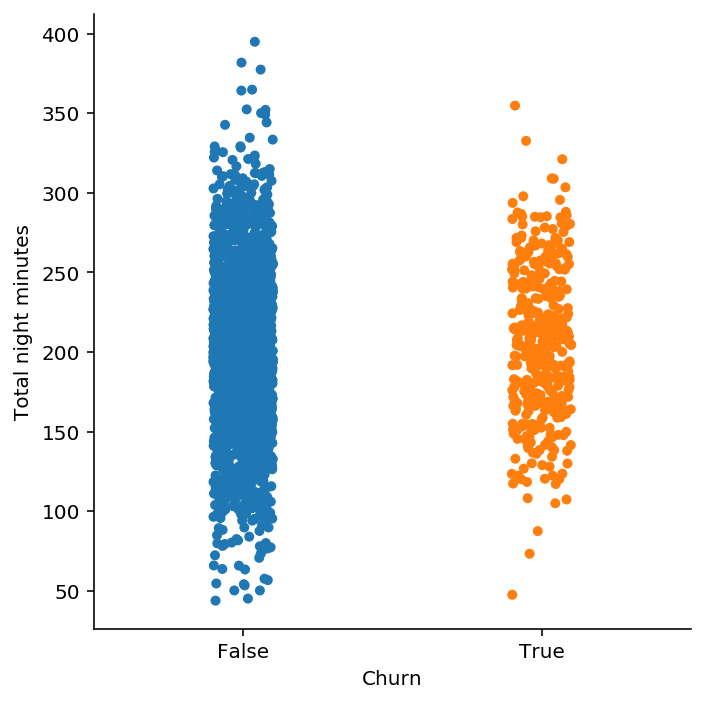

In [578]:
sns.catplot("Churn", "Total night minutes", data = df)

In [579]:
#Total night calls

In [580]:
# examining the Total night calls of the not_churn group
not_churn["Total night calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean      100.007902
std        19.307282
min        33.000000
5%         68.000000
25%        87.000000
50%       100.000000
75%       113.000000
90%       124.000000
95%       131.000000
99%       146.230000
max       166.000000
Name: Total night calls, dtype: float64

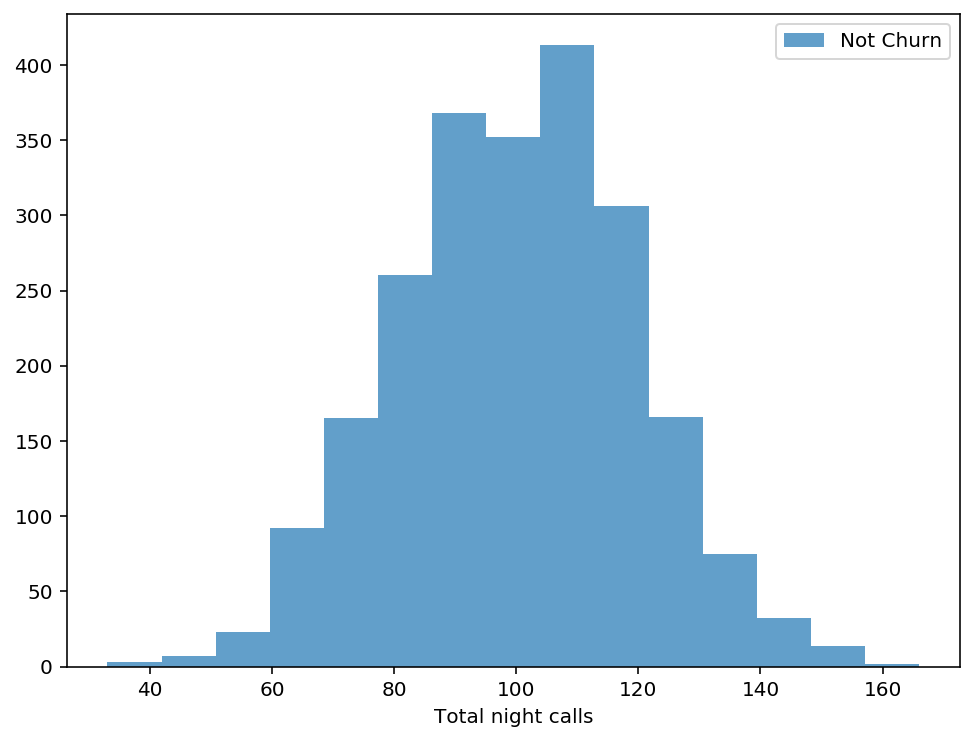

In [581]:
# distribution of the Total night calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night calls')
pyplot.hist(not_churn["Total night calls"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [582]:
# examining the Total night calls of the churn group
churn["Total night calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean     100.682990
std       20.074667
min       49.000000
5%        69.350000
25%       85.750000
50%      101.000000
75%      116.000000
90%      126.000000
95%      132.000000
99%      147.520000
max      158.000000
Name: Total night calls, dtype: float64

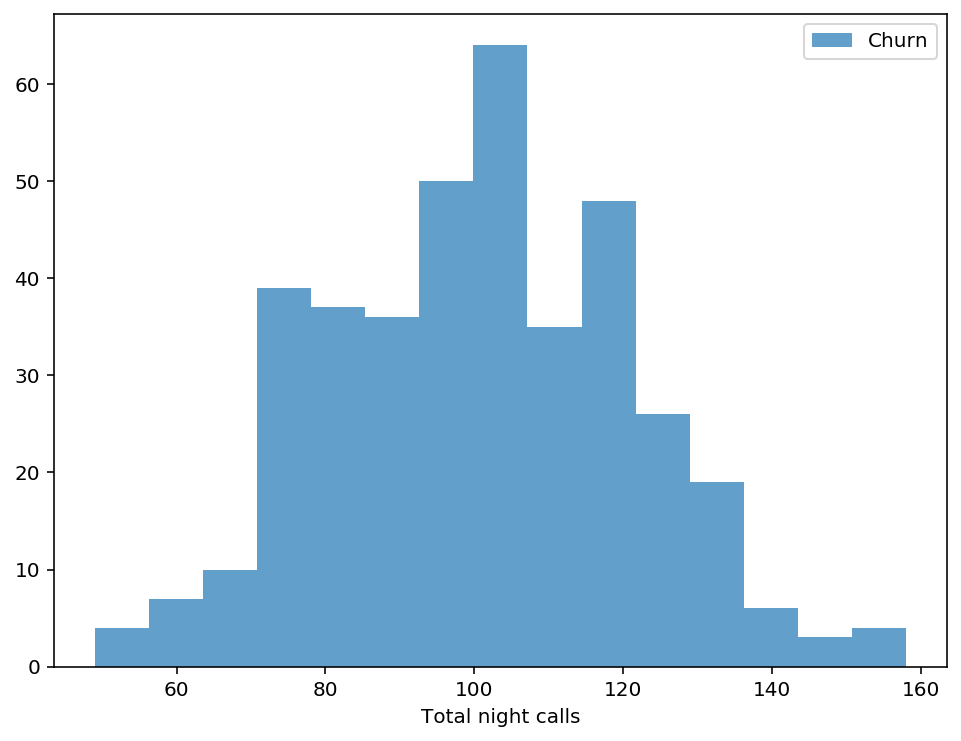

In [583]:
# distribution of the Total night calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night calls')
pyplot.hist(churn["Total night calls"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

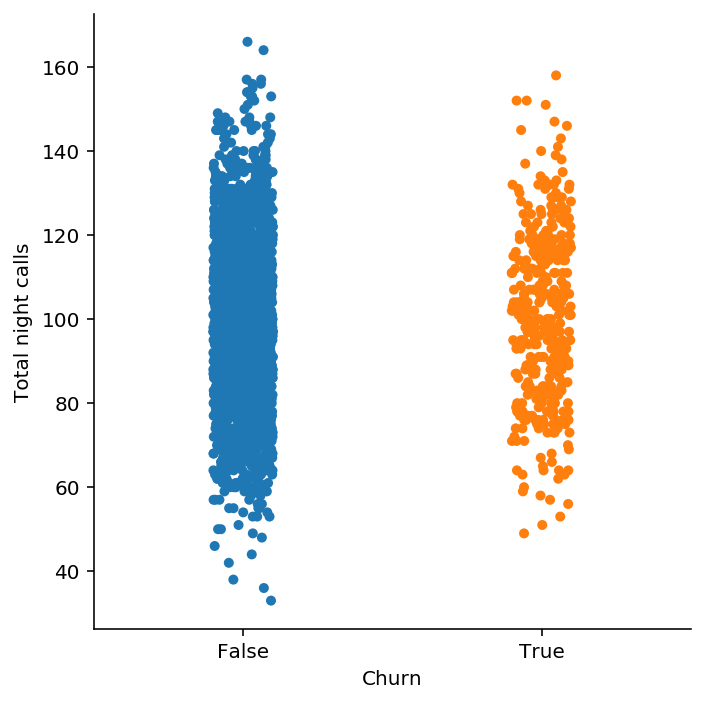

In [584]:
sns.catplot("Churn", "Total night calls", data = df)

In [585]:
#Total night charge

In [586]:
# examining the Total night charge of the not_churn group
not_churn["Total night charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean        9.020975
std         2.307779
min         1.970000
5%          5.150000
25%         7.462500
50%         9.000000
75%        10.607500
90%        11.893000
95%        12.804500
99%        14.436900
max        17.770000
Name: Total night charge, dtype: float64

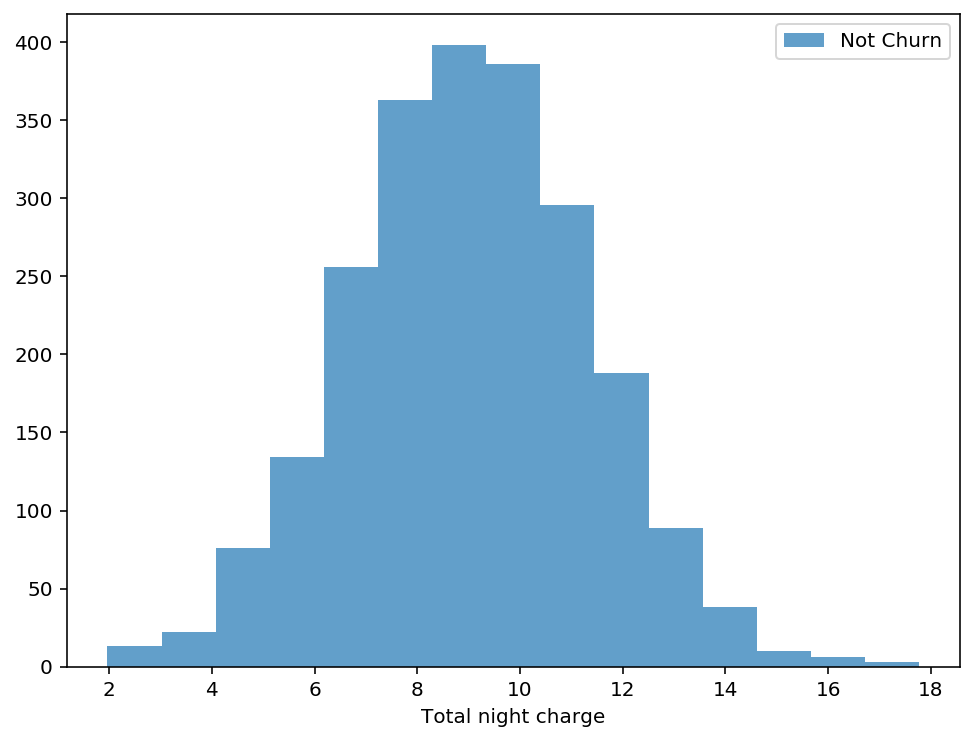

In [587]:
# distribution of the Total night charge for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night charge')
pyplot.hist(not_churn["Total night charge"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [588]:
# examining the Total night charge of the churn group
churn["Total night charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean       9.238892
std        2.140617
min        2.130000
5%         5.817500
25%        7.647500
50%        9.225000
75%       10.852500
90%       12.013000
95%       12.633000
99%       13.901300
max       15.970000
Name: Total night charge, dtype: float64

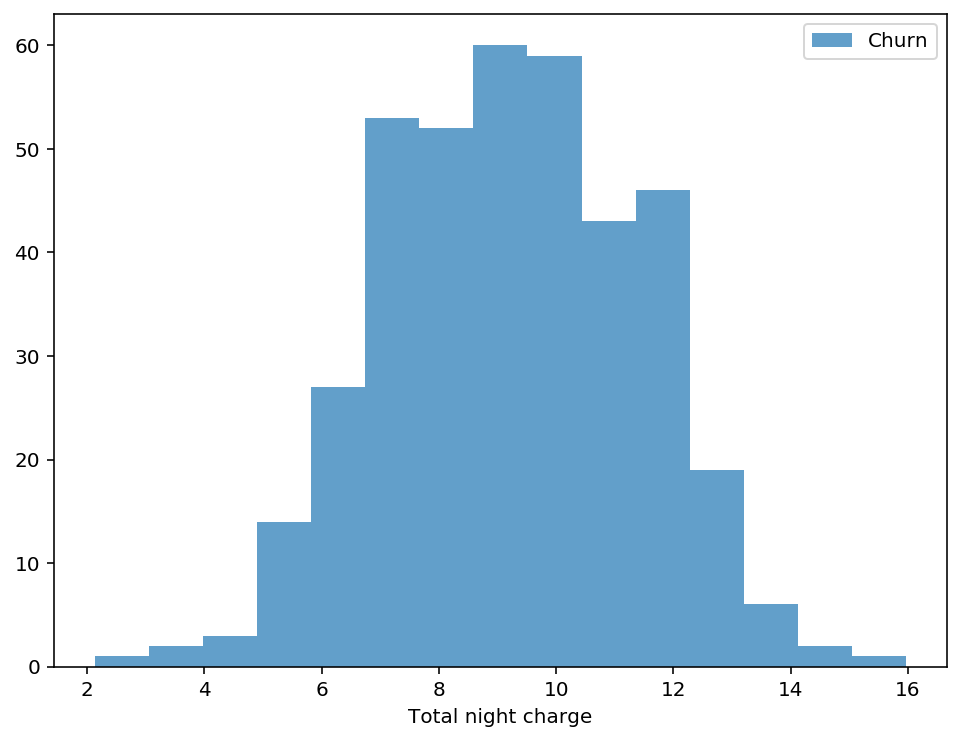

In [589]:
# distribution of the TTotal night charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total night charge')
pyplot.hist(churn["Total night charge"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

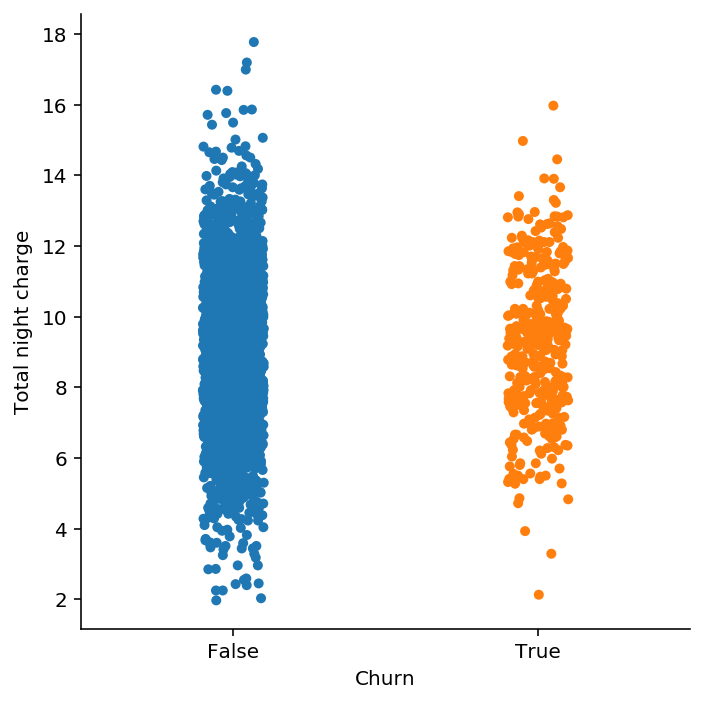

In [590]:
sns.catplot("Churn", "Total night charge", data = df)

In [591]:
#Total intl minutes

In [592]:
# examining the Total intl minutes of the not_churn group
not_churn["Total intl minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean       10.137840
std         2.779622
min         0.000000
5%          5.700000
25%         8.400000
50%        10.200000
75%        12.000000
90%        13.430000
95%        14.600000
99%        16.400000
max        18.900000
Name: Total intl minutes, dtype: float64

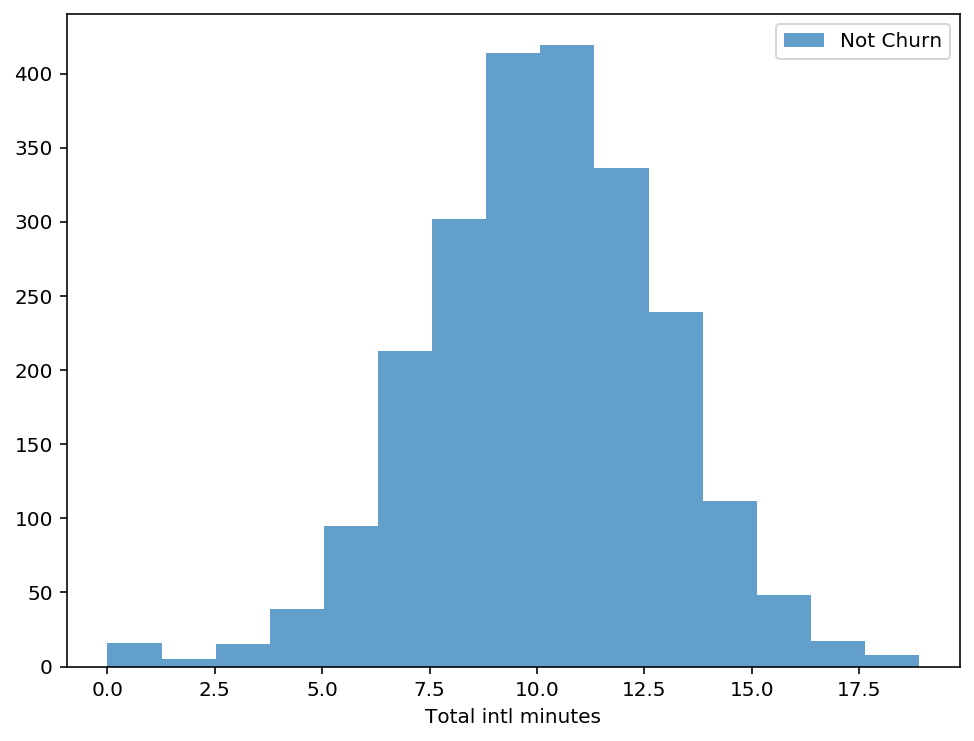

In [593]:
# distribution of the Total intl minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl minutes')
pyplot.hist(not_churn["Total intl minutes"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [594]:
# examining the Total intl minutes of the churn group
churn["Total intl minutes"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean      10.819330
std        2.771824
min        3.900000
5%         6.200000
25%        8.900000
50%       10.800000
75%       12.925000
90%       14.100000
95%       14.800000
99%       17.326000
max       20.000000
Name: Total intl minutes, dtype: float64

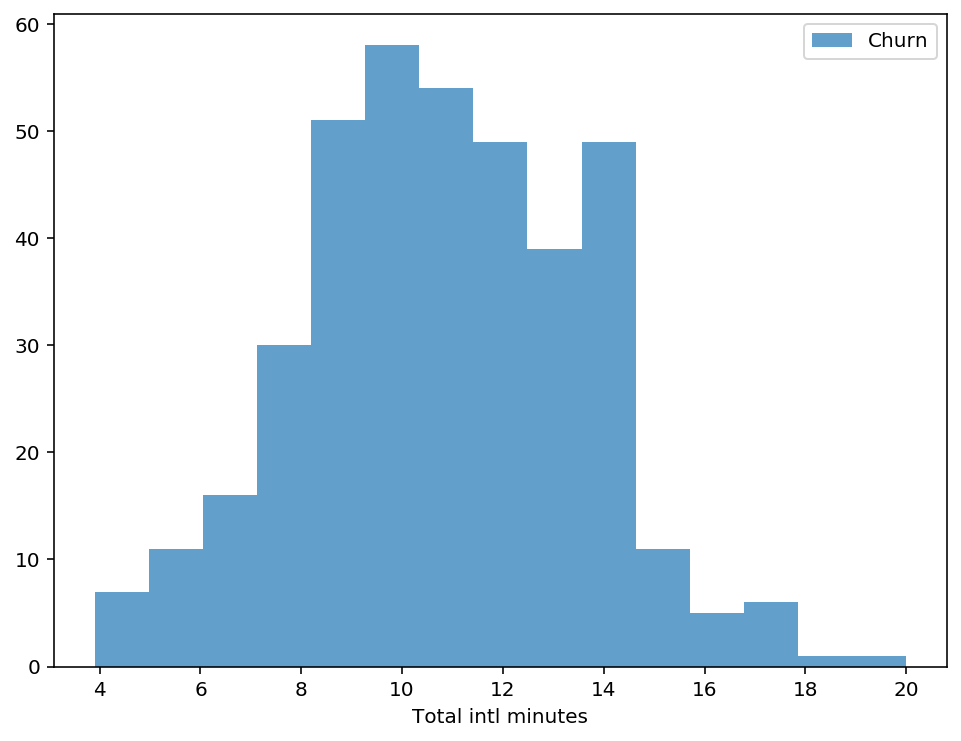

In [595]:
# distribution of the Total intl minutes for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl minutes')
pyplot.hist(churn["Total intl minutes"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

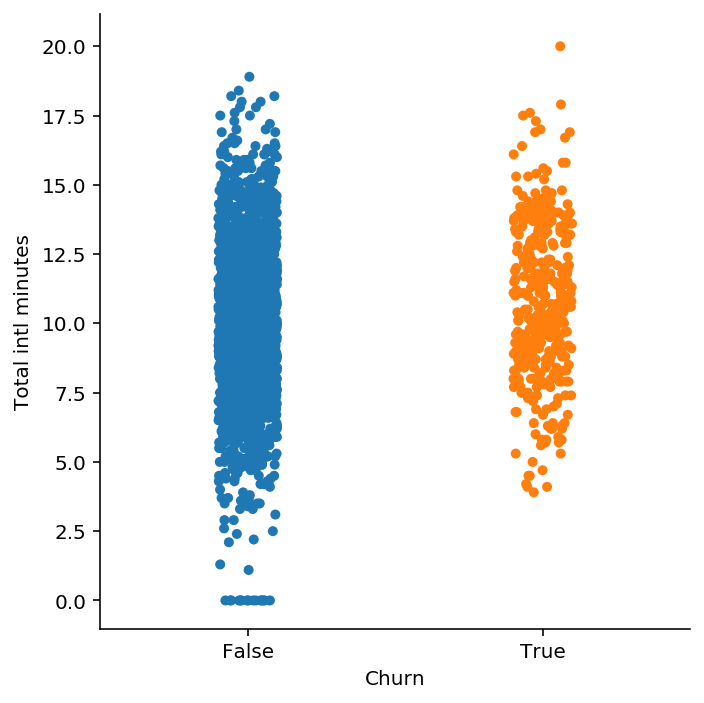

In [596]:
sns.catplot("Churn", "Total intl minutes", data = df)

In [597]:
#Total intl calls

In [598]:
# examining the Total intl calls of the not_churn group
not_churn["Total intl calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean        4.538191
std         2.447533
min         0.000000
5%          1.850000
25%         3.000000
50%         4.000000
75%         6.000000
90%         8.000000
95%         9.000000
99%        13.000000
max        19.000000
Name: Total intl calls, dtype: float64

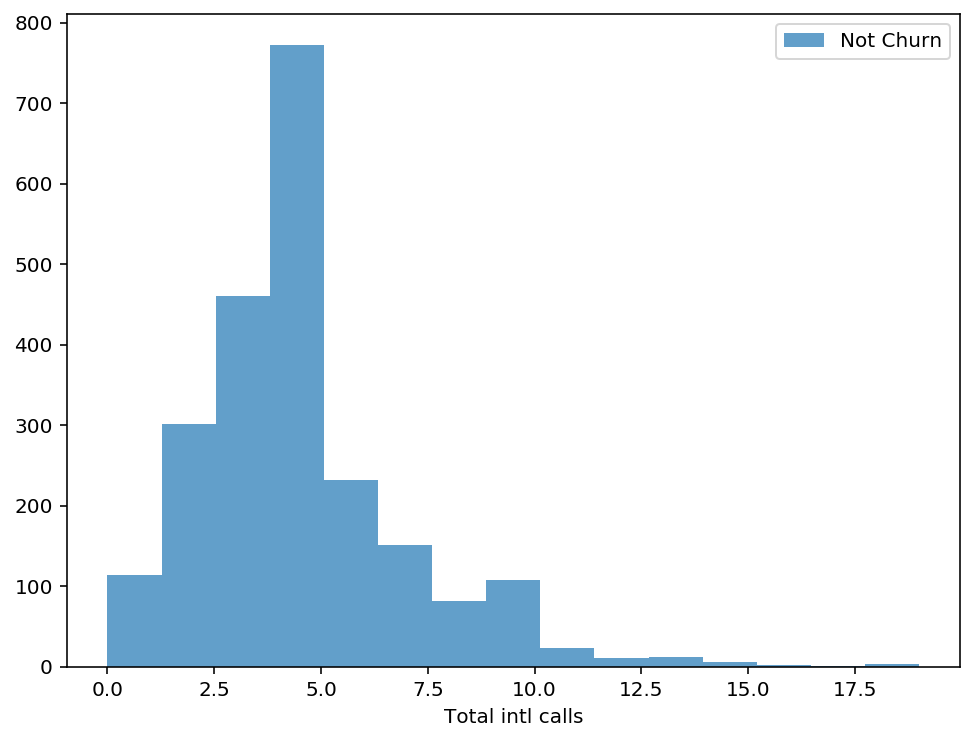

In [599]:
# distribution of the Total intl calls charge for not_churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl calls')
pyplot.hist(not_churn["Total intl calls"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [600]:
# examining the Total intl calls of the churn group
churn["Total intl calls"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean       4.051546
std        2.468912
min        1.000000
5%         1.000000
25%        2.000000
50%        3.000000
75%        5.000000
90%        7.000000
95%        9.000000
99%       13.130000
max       20.000000
Name: Total intl calls, dtype: float64

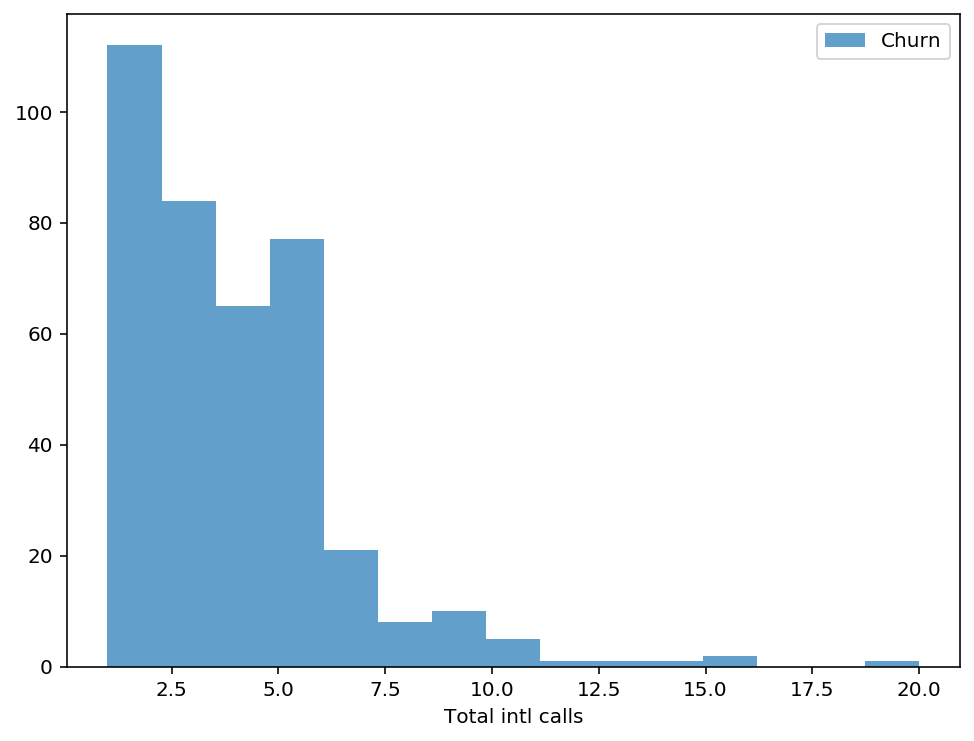

In [601]:
# distribution of the Total intl calls for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl calls')
pyplot.hist(churn["Total intl calls"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

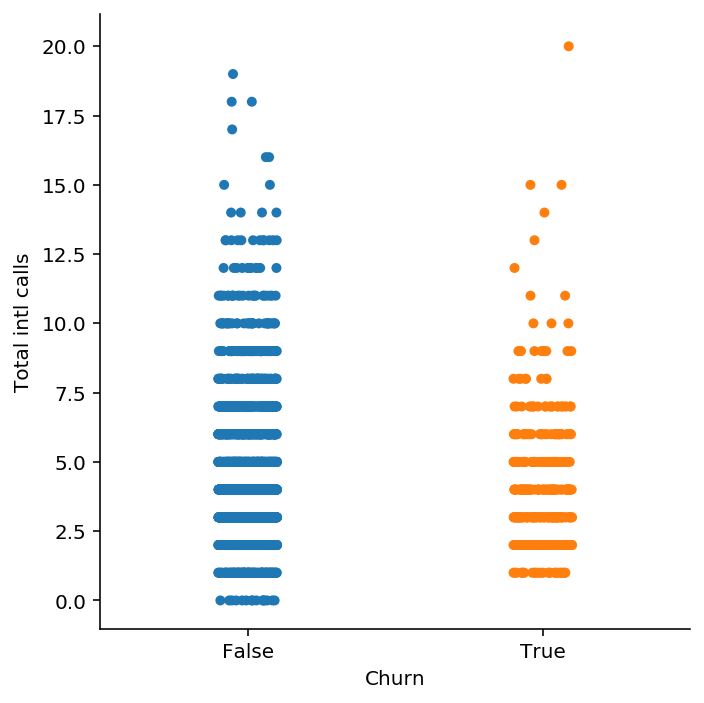

In [602]:
sns.catplot("Churn", "Total intl calls", data = df)

In [603]:
#Total intl charge

In [604]:
# examining the Total intl charge of the not_churn group
not_churn["Total intl charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    2278.000000
mean        2.737709
std         0.750441
min         0.000000
5%          1.540000
25%         2.270000
50%         2.750000
75%         3.240000
90%         3.629000
95%         3.940000
99%         4.430000
max         5.100000
Name: Total intl charge, dtype: float64

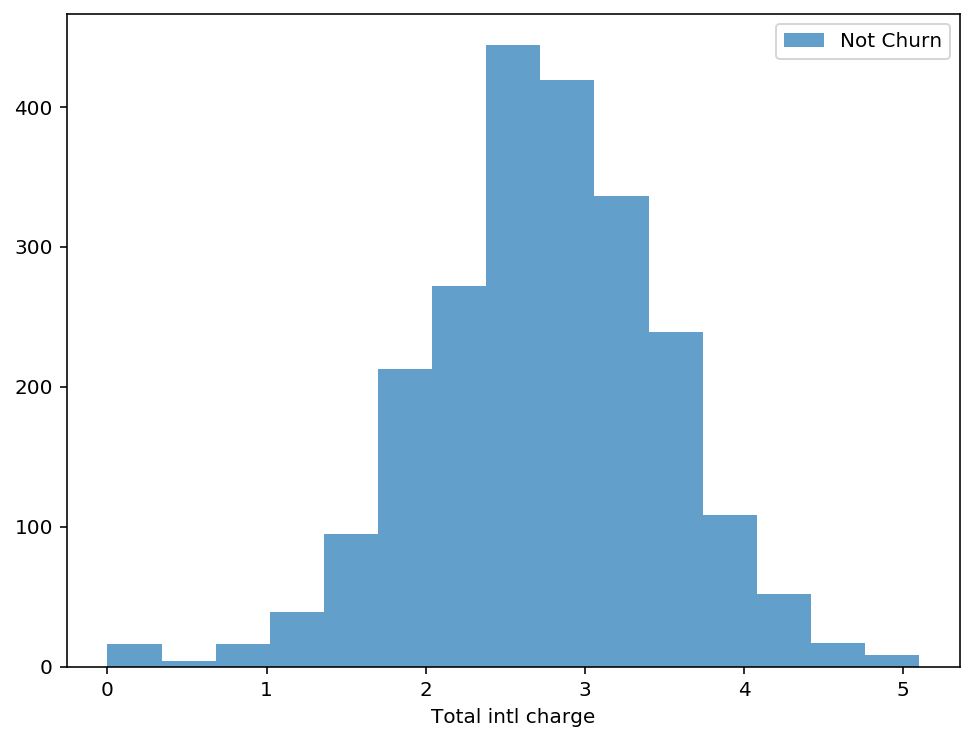

In [605]:
# distribution of the Total intl charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl charge')
pyplot.hist(not_churn["Total intl charge"],bins=15, alpha=0.7, label='Not Churn')
pyplot.legend(loc='upper right')
pyplot.show()

In [606]:
# examining the Total intl charge of the churn group
churn["Total intl charge"].describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

count    388.000000
mean       2.921727
std        0.748431
min        1.050000
5%         1.670000
25%        2.400000
50%        2.920000
75%        3.487500
90%        3.810000
95%        4.000000
99%        4.677800
max        5.400000
Name: Total intl charge, dtype: float64

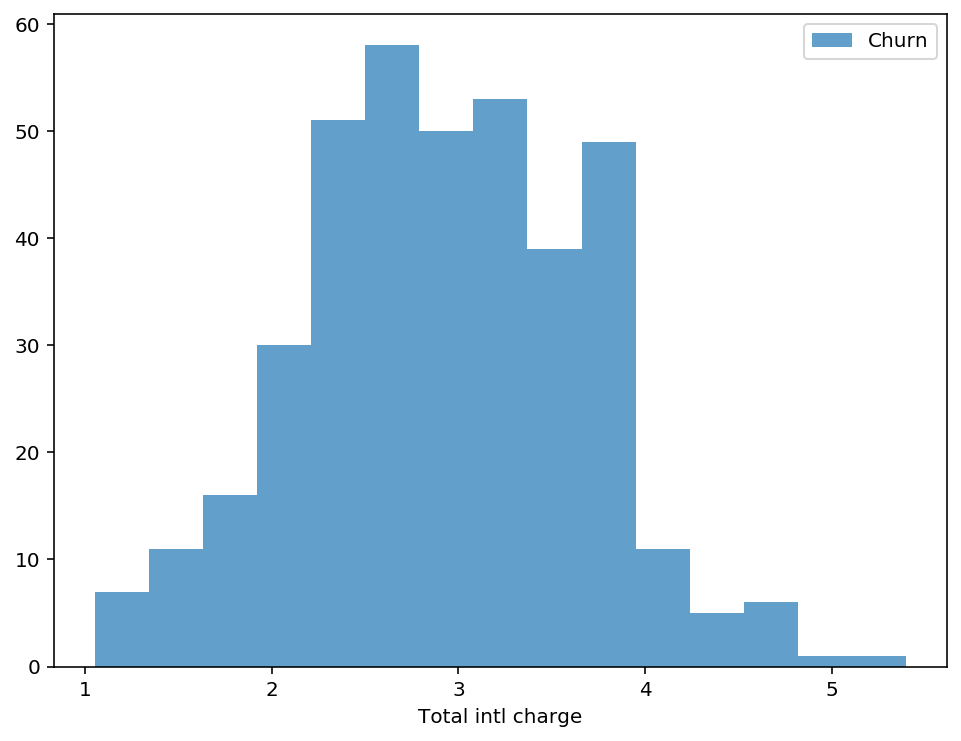

In [607]:
# distribution of the Total intl charge for churn
pyplot.figure(figsize=(8,6))
pyplot.xlabel('Total intl charge')
pyplot.hist(churn["Total intl charge"],bins=15, alpha=0.7, label='Churn')
pyplot.legend(loc='upper right')
pyplot.show()

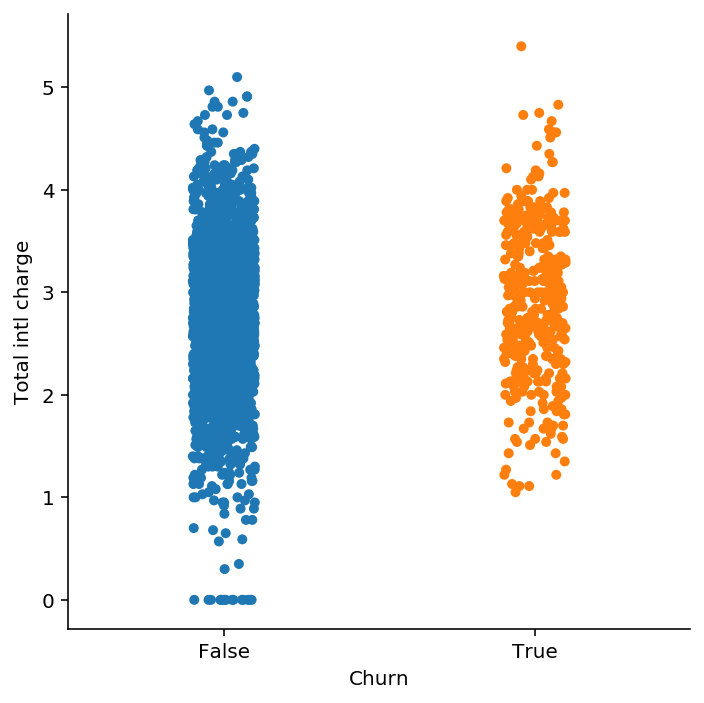

In [608]:
sns.catplot("Churn", "Total intl charge", data = df)

In [609]:
#Correlation Matrix

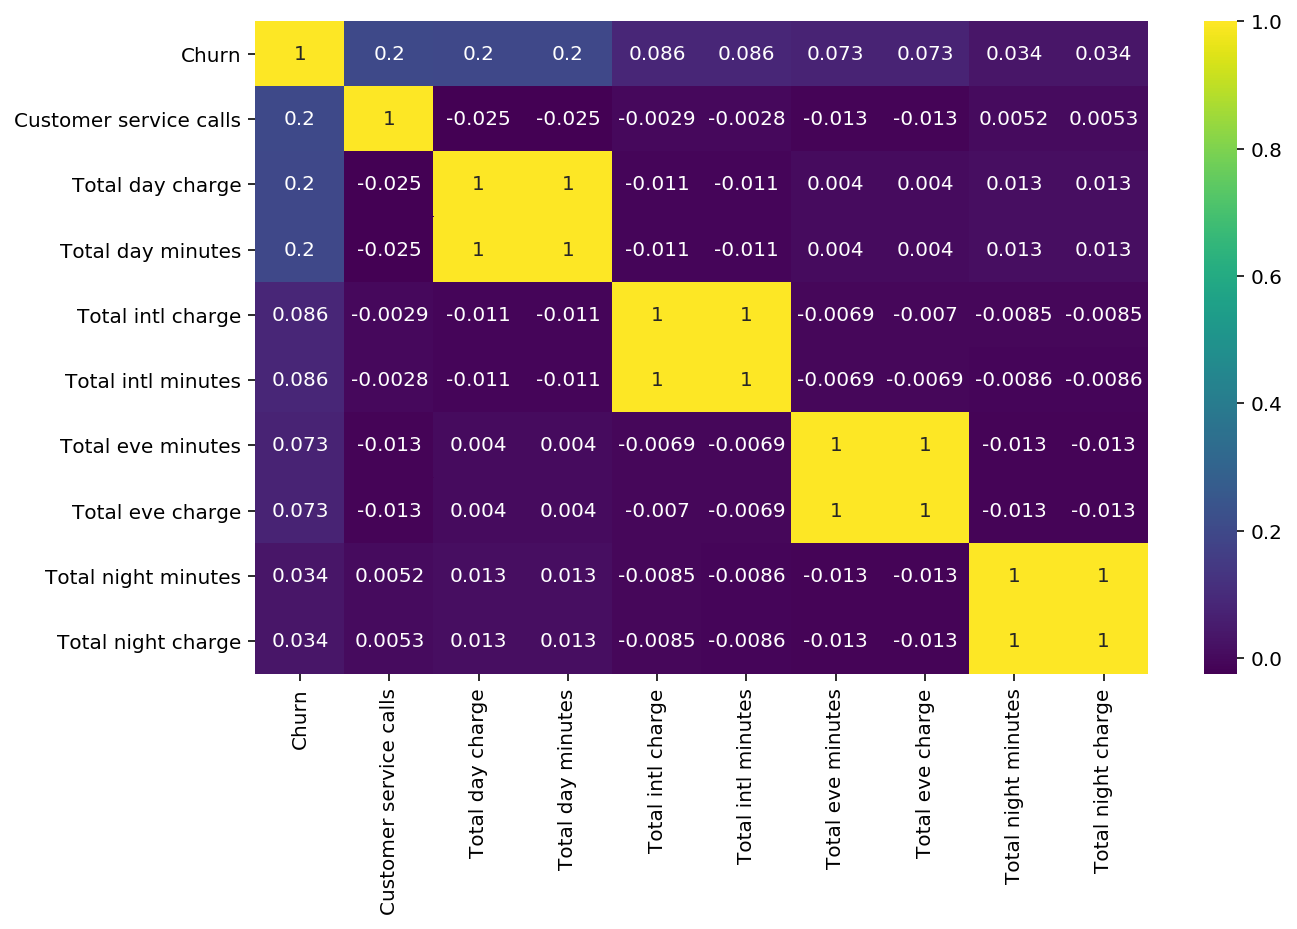

In [610]:
# Churn correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Churn')['Churn'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [615]:
#Correlation between Total day minutes and Total day change, Total intl minutes and Total intl charge,
#Total eve charge and Total eve minutes, Total night change and Total night minutes

In [616]:
#2- Data Preprocessing

In [617]:
    #Missing Value

In [618]:
        # Missing Observation Analysis

In [619]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [620]:
    #Outliers

In [621]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [622]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=False):
   #variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

In [623]:
# There is no outlier
for var in numeric_variables:
    print(var, "has " , has_outliers(df, [var]),  "Outliers")

Account length has  None Outliers
Number vmail messages has  None Outliers
Total day minutes has  None Outliers
Total day calls has  None Outliers
Total day charge has  None Outliers
Total eve minutes has  None Outliers
Total eve calls has  None Outliers
Total eve charge has  None Outliers
Total night minutes has  None Outliers
Total night calls has  None Outliers
Total night charge has  None Outliers
Total intl minutes has  None Outliers
Total intl calls has  None Outliers
Total intl charge has  None Outliers


In [624]:
    #Feature Engineering

In [625]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [626]:
# Variables to apply one hot encoding
list = ["Churn"]
df = pd.get_dummies(df, columns =list, drop_first = True)

In [627]:
df = df.replace({'International plan':['Yes','No']}  
,{'International plan':['1','0']})

In [628]:
df = df.replace({'Voice mail plan':['Yes','No']}  
,{'Voice mail plan':['1','0']})

In [629]:
df['Voicemailplan'] = df['Voice mail plan']

In [630]:
df["NewTotaldayminutes"] = pd.qcut(df['Total day minutes'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])

In [631]:
df["Customer service calls"] = pd.qcut(df['Customer service calls'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])

In [632]:
df['NewCustomerservicecalls'] = df['Customer service calls']

In [633]:
df["Total day charge"] = pd.qcut(df['Total day charge'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])

In [634]:
df['NewTotaldaycharge'] = df['Total day charge']

In [649]:
df = df.replace({'State':['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']}  
,{'State':['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51']})


In [650]:
df.head(20)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn_True,Voicemailplan,NewTotaldayminutes,NewCustomerservicecalls,NewTotaldaycharge
0,16,128,415,0,1,25,265.1,110,5,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,2,0,1,8,2,5
1,35,107,415,0,1,26,161.6,123,2,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,2,0,1,3,2,2
2,30,137,415,0,0,0,243.4,114,5,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,1,0,0,8,1,5
3,35,84,408,1,0,0,299.4,71,5,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,3,0,0,8,3,5
4,36,75,415,1,0,0,166.7,113,3,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,4,0,0,4,4,3
5,1,118,510,1,0,0,223.4,98,4,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,1,0,0,7,1,4
6,21,121,510,0,1,24,218.2,88,4,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,4,0,1,7,4,4
7,25,147,415,1,0,0,157.0,79,2,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,1,0,0,3,1,2
8,48,141,415,1,1,37,258.6,84,5,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,1,0,1,8,1,5
9,39,74,415,0,0,0,187.7,127,3,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,1,0,0,5,1,3


In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   State                    2666 non-null   object  
 1   Account length           2666 non-null   int64   
 2   Area code                2666 non-null   int64   
 3   International plan       2666 non-null   int32   
 4   Voice mail plan          2666 non-null   int32   
 5   Number vmail messages    2666 non-null   int64   
 6   Total day minutes        2666 non-null   float64 
 7   Total day calls          2666 non-null   int64   
 8   Total day charge         2666 non-null   category
 9   Total eve minutes        2666 non-null   float64 
 10  Total eve calls          2666 non-null   int64   
 11  Total eve charge         2666 non-null   float64 
 12  Total night minutes      2666 non-null   float64 
 13  Total night calls        2666 non-null   int64   
 14  Total ni

In [637]:
df['Churn_True']=df['Churn_True'].astype(int)

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   State                    2666 non-null   object  
 1   Account length           2666 non-null   int64   
 2   Area code                2666 non-null   int64   
 3   International plan       2666 non-null   object  
 4   Voice mail plan          2666 non-null   object  
 5   Number vmail messages    2666 non-null   int64   
 6   Total day minutes        2666 non-null   float64 
 7   Total day calls          2666 non-null   int64   
 8   Total day charge         2666 non-null   category
 9   Total eve minutes        2666 non-null   float64 
 10  Total eve calls          2666 non-null   int64   
 11  Total eve charge         2666 non-null   float64 
 12  Total night minutes      2666 non-null   float64 
 13  Total night calls        2666 non-null   int64   
 14  Total ni

In [639]:
df['NewTotaldayminutes']=df['NewTotaldayminutes'].astype(int)

In [640]:
df['NewCustomerservicecalls']=df['NewCustomerservicecalls'].astype(int)

In [641]:
df['NewTotaldaycharge']=df['NewTotaldaycharge'].astype(int)

In [642]:
df['International plan']=df['International plan'].astype(int)

In [643]:
df['Voice mail plan']=df['Voice mail plan'].astype(int)

In [652]:
df['Voicemailplan']=df['Voicemailplan'].astype(int)

In [657]:
df['State']=df['State'].astype(int)

In [658]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   State                    2666 non-null   int32   
 1   Account length           2666 non-null   int64   
 2   Area code                2666 non-null   int64   
 3   International plan       2666 non-null   int32   
 4   Voice mail plan          2666 non-null   int32   
 5   Number vmail messages    2666 non-null   int64   
 6   Total day minutes        2666 non-null   float64 
 7   Total day calls          2666 non-null   int64   
 8   Total day charge         2666 non-null   category
 9   Total eve minutes        2666 non-null   float64 
 10  Total eve calls          2666 non-null   int64   
 11  Total eve charge         2666 non-null   float64 
 12  Total night minutes      2666 non-null   float64 
 13  Total night calls        2666 non-null   int64   
 14  Total ni

In [659]:
#One Hot Encoding

In [660]:
# Scale features using statistics that are robust to outliers.
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.01)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [661]:
new_cols_ohe = ["NewCustomerservicecalls", "NewTotaldaycharge", "NewTotaldayminutes"]
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) <= 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Churn_True"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [662]:
X = df.drop("Churn_True",axis=1)
y = df["Churn_True"]
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345)
# Models for Classification
models = [('LR', LogisticRegression(random_state=123456)),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=123456)),
          ('RF', RandomForestClassifier(random_state=123456)),
          ('SVR', SVC(gamma='auto',random_state=123456)),
          ('GB', GradientBoostingClassifier(random_state = 12345)),
          ("LightGBM", LGBMClassifier(random_state=123456))]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.868331 (0.022226)
KNN: 0.863078 (0.021229)
CART: 0.876994 (0.023931)
RF: 0.918594 (0.016229)
SVR: 0.877321 (0.028027)
GB: 0.924223 (0.020697)
LightGBM: 0.926099 (0.016978)


In [663]:
# GB Confusion Matrix
model_GB = GradientBoostingClassifier(random_state=12345)
model_GB.fit(X_train, y_train)
y_pred = model_GB.predict(X_test)
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[464,  32],
       [  2,  36]], dtype=int64)

In [664]:
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  36
True Negative :  464
False Positive:  32
False Negative:  2


In [665]:
# Classification Report for XGB Model
print(classification_report(model_GB.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.96       496
           1       0.53      0.95      0.68        38

    accuracy                           0.94       534
   macro avg       0.76      0.94      0.82       534
weighted avg       0.96      0.94      0.94       534



In [666]:
# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

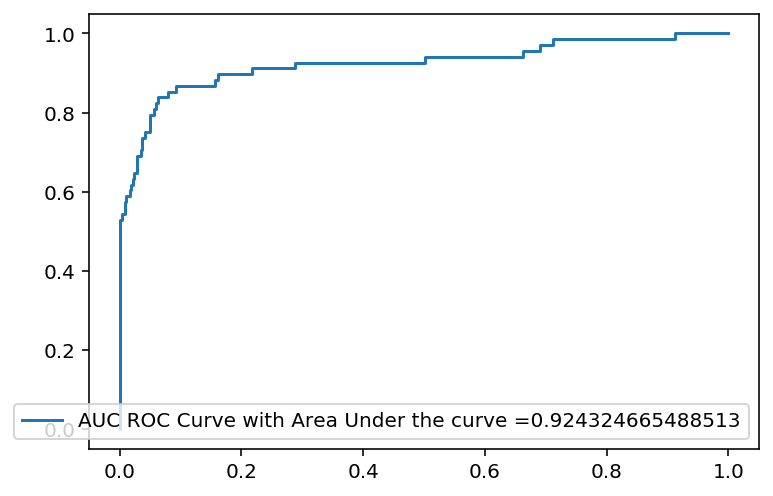

In [667]:
generate_auc_roc_curve(model_GB, X_test)

In [668]:
#4- Model Tuning

In [669]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 6,
 'n_estimators': 500}

lgbm_tuned = LGBMClassifier(**lgbm_params).fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


In [670]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
gbm_tuned = GradientBoostingClassifier(**gbm_params).fit(X,y)

In [671]:
# evaluate each model in turn
models = [("LightGBM", lgbm_tuned),
          ("GB",gbm_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
LightGBM: 0.929850 (0.015125)
GB: 0.923855 (0.013729)


[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


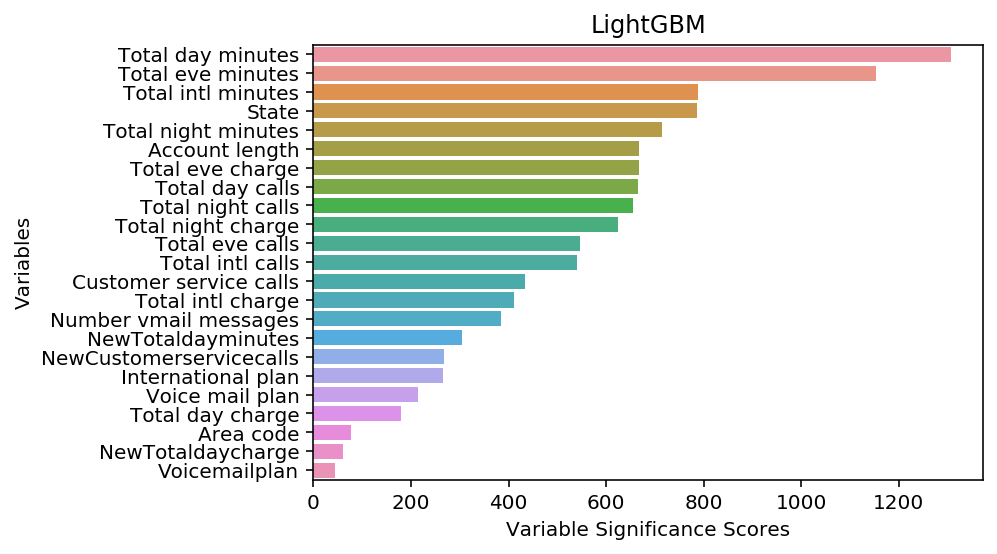

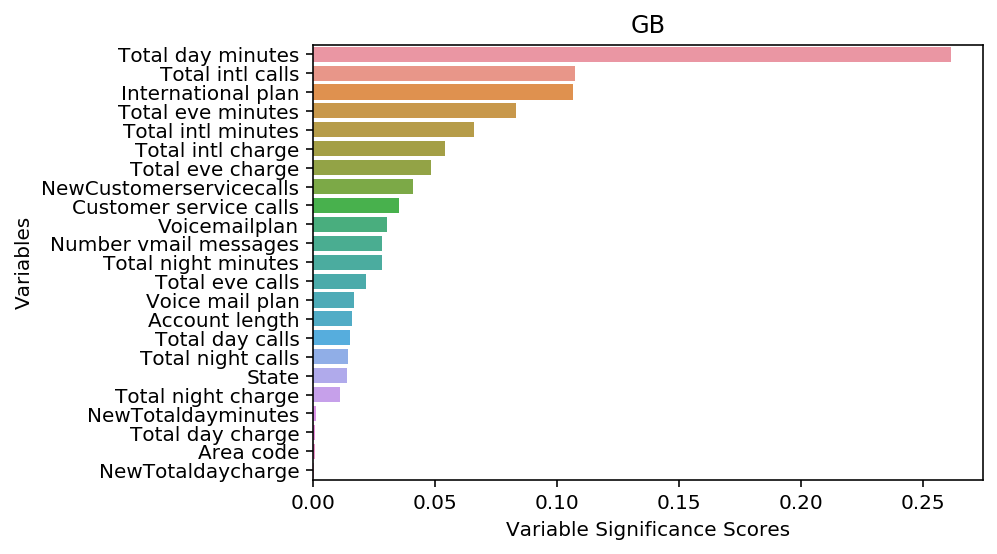

In [672]:
for name, model in models:
        base = model.fit(X_train,y_train)
        y_pred = base.predict(X_test)
        acc_score = accuracy_score(y_test, y_pred)
        feature_imp = pd.Series(base.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Variable Significance Scores')
        plt.ylabel('Variables')
        plt.title(name)
        plt.show()